# PROJET 03 : TRAITEMENT DE DONNEES NUTRITIONELLES  04/04

# Importation des librairies necessaires au projet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from langdetect import detect
#import re
#import langdetect
#from langdetect import detect
#from langdetect import detect_langs
%matplotlib inline
#To show all rows and colum
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Importation du dataset avec uniquement les colonnes a utiliser 

In [2]:
df = pd.read_csv('df4.csv')

In [3]:
df.head(2)

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087.0,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,farine de blé noir,ferme t'y r'nao,en:fr,not specified,0.0,0.00,0.000,0.00,0.00,0.0,0.00,0.0,0.0000,NaN,NaN
1,4530.0,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,banana chips sweetened (whole),not specified,us,not specified,2243.0,28.57,0.018,64.29,14.29,3.6,3.57,0.0,0.0214,14.0,14.0


In [4]:
# Evaluation de la distribution geographique des variables du dataset
# Le traitement de cette colonne pour une uniformisation qui faciliterait l'utilisation de la locaisation geo
# prenderait un temps superieur a celui alloue dans le cadre de ce projet
df['countries'].value_counts(sort=True)

us                                                                                                                                                                 169552
france                                                                                                                                                              76029
en:fr                                                                                                                                                               11322
suisse                                                                                                                                                               9184
deutschland                                                                                                                                                          5827
                                                                                                                                                      

In [5]:
df['countries'].nunique()

1357

In [6]:
dg=df.loc[df['countries'].str.contains('france')]

In [7]:
dg['countries'].value_counts()

france                                                               76029
france, suisse                                                         499
belgique,france                                                        217
france,suisse                                                          209
uk,france                                                              124
                                                                     ...  
france,belgique,danemark                                                 1
saint pierre and miquelon, en:france, en:belgium                         1
royaume-uni,france, en:denmark, suisse                                   1
france,belgique,allemagne,suisse,autriche,pays-bas,danemark,suède        1
china, en:france                                                         1
Name: countries, Length: 559, dtype: int64

In [8]:
#pd.set_option('display.max_rows', None)
geo_dist = pd.DataFrame(df['countries'].value_counts())
geo_dist.index

Index(['us', 'france', 'en:fr', 'suisse', 'deutschland', 'españa',
       'united kingdom', 'united states', 'en:ch', 'australia',
       ...
       'switzerland,france, allemagne', 'црна гора,србија',
       'réunion, en:france', 'danemark,france,guadeloupe',
       'germany,portugal,spain', 'belgique,france,suisse, en:germany',
       'tunisie,france', 'global market',
       'dánia,finnország,franciaország,németország,magyarország,olaszország,hollandia,norvégia,portugália,oroszország,szlovénia,spanyolország,svédország,nagy-britannia',
       'en:an, en:france'],
      dtype='object', length=1357)

In [9]:
geo_dist.loc[geo_dist['countries']>100]

,countries
us,169552
france,76029
en:fr,11322
suisse,9184
deutschland,5827
españa,3670
united kingdom,2953
united states,2105
en:ch,1557
australia,1395


# Selection du dataframe relatif au produit 'ice cream'

In [10]:
df2=df.loc[df['product_name'].str.contains('ice cream|glaces')]

In [11]:
df2.shape

(3195, 20)

In [12]:
# Traitement des valeurs 'countries'
df2['countries'].value_counts()

us                                                        3117
france                                                      26
suisse                                                      20
australia                                                    5
united states                                                4
schweiz                                                      3
united kingdom                                               2
ireland                                                      2
en:fr                                                        2
belgium                                                      2
en:es                                                        2
frankreich,schweiz,deutschland                               1
new zealand                                                  1
en:gb                                                        1
en:fr, suisse                                                1
france,allemagne                                       

In [13]:
# Effectuer certains replacement pour l'uniformisation du dataset pour la colonne countries

In [14]:
replacement ={
    'en:fr':'france',
    'frankreich':'france',
    'us':'united states',
    'en:united states':'united states',
    'en:us':'united states',
    'deutschland':'allemagne',
    'germany':'allemagne',
    'australia':'australie',
    'aunited statestralia':'australie',
    'aunited statestralie':'australie',
    'schweiz':'suisse',
    'switzerland':'suisse',
    'austria':'autriche',
    'belgium':'belgique',
    'netherlands':'pays-bas',
    'new zealand':'nouvelle zelande',
    'en:gb':'royaume-uni',
    'united kingdom':'royaume-uni',
    'en:es':'espagne',
    'aunited statestria':'autriche',
    'autrice':'autriche',
    'en:united states':'united states',
    'irelandee':'ireland'
    
   
}
df2['countries'].replace(replacement, regex=True , inplace=True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [15]:
# Colonne countries unifromisee
df2['countries'].value_counts()

united states                                                   3121
france                                                            28
suisse                                                            23
aunited statestralia                                               5
royaume-uni                                                        3
belgique                                                           2
ireland                                                            2
espagne                                                            2
nouvelle zelande                                                   1
aunited statestria,belgique,france,allemagne,pays-bas,suisse       1
allemagne                                                          1
france,suisse,allemagne                                            1
en:united states                                                   1
france, suisse                                                     1
france,royaume-uni, suisse        

In [16]:
# Calcul de la distribution par pays
# On calcul l'occurence de chaque nom de pays dans un string concatene a travers l'ensemble des valeurs du dataframe

In [17]:
dic_countries=['united states','france','royaume-uni','suisse','allemagne','portugal','ireland','australie','belgique','espagne','autriche','pays-bas','nouvelle zelande']

In [19]:
# Construction d'une boucle pour le calcul de l'occurence pour chaque pays et export du resultat en format dataframe
d=[]
for i in dic_countries:
    et =z.count(i)
    d.append({
        'country':i,
        'count':et
    }
    )
country_count = pd.DataFrame(d)
country_count

,country,count
0,united states,3128
1,france,33
2,royaume-uni,4
3,suisse,27
4,allemagne,4
5,portugal,1
6,ireland,2
7,australie,0
8,belgique,3
9,espagne,2


In [20]:
pd.DataFrame(df2['creator'].value_counts())

,creator
usda-ndb-import,3117
openfood-ch-import,22
openfoodfacts-contributors,11
kiliweb,6
tacinte,4
foodorigins,4
nvallas,3
aleene,2
hystiff,2
kvliegen,2


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3195 entries, 280 to 302677
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     3195 non-null   float64
 1   url                      3195 non-null   object 
 2   creator                  3195 non-null   object 
 3   created_datetime         3195 non-null   object 
 4   last_modified_datetime   3195 non-null   object 
 5   product_name             3195 non-null   object 
 6   brands                   3195 non-null   object 
 7   countries                3195 non-null   object 
 8   main_category            3195 non-null   object 
 9   energy_100g              3195 non-null   float64
 10  fat_100g                 3195 non-null   float64
 11  cholesterol_100g         3195 non-null   float64
 12  carbohydrates_100g       3195 non-null   float64
 13  sugars_100g              3195 non-null   float64
 14  fiber_100g          

In [22]:
df_num =(['energy_100g', 'fat_100g','cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'vitamin-c_100g'])

In [23]:
d=[]
for i in df2[df_num]:
    x = df2[i].isna().sum()
    y = df2[i].value_counts().sum()
    z = df2[i].dtypes
    w = (df2[i]==0).sum()
    g = (df2[i]>100).sum()
    t = (df2[i]>900).sum()
    m = df2[i].mean()
    p = df2[i].max()
    l = df2[i].min()
       
    d.append(
        {
            'variable':i,
            'count_of_values':y,
            'Null_value':x,
            'dtype' : z,
            'Zero_values':w,
            'min':l,
            'Mean':m,
            'max':p,
            'Outliers > 100':g,
            'Outliers-excess > 900':t
        }
    )
gg=pd.DataFrame(d)
gg

,variable,count_of_values,Null_value,dtype,Zero_values,min,Mean,max,Outliers > 100,Outliers-excess > 900
0,energy_100g,3195,0,float64,19,0.0,975.589671,2720.0000,3168,1994
1,fat_100g,3195,0,float64,118,0.0,11.748213,52.9400,0,0
2,cholesterol_100g,3195,0,float64,211,0.0,0.058705,70.5880,0,0
3,carbohydrates_100g,3195,0,float64,25,0.0,28.947061,96.4300,0,0
4,sugars_100g,3195,0,float64,44,0.0,21.751577,91.6700,0,0
5,fiber_100g,3195,0,float64,2001,0.0,0.714870,38.7000,0,0
6,proteins_100g,3195,0,float64,77,0.0,3.656973,24.0000,0,0
7,salt_100g,3195,0,float64,47,0.0,0.257351,54.3560,0,0
8,vitamin-c_100g,3195,0,float64,2559,0.0,0.000692,0.0508,0,0


In [24]:
# Traitement de la colonne 'Energy'

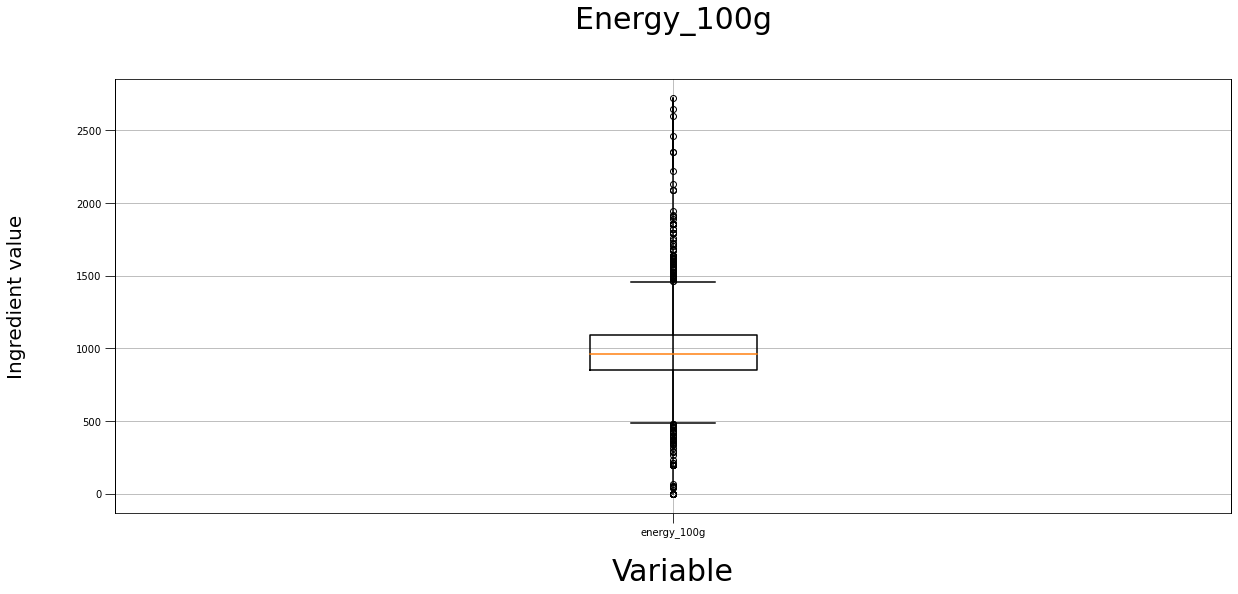

In [25]:
ax = df2['energy_100g'].plot(kind='box',
             color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=True, grid=True, rot=0, figsize = (20,8))
# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both',size=10 )  # 'both' refers to minor and major axes
# set labels 
ax.set_title("Energy_100g", fontsize=30, color='black',pad=50)
ax.set_xlabel('Variable', fontsize=30, color='black',rotation=0)
ax.yaxis.labelpad = 50
ax.xaxis.labelpad = 20
ax.title.labelpad = 100
ax.set_ylabel('Ingredient value', fontsize=20, color='black')
plt.show()

In [26]:
df2['energy_100g'].max()

2720.0

In [27]:
# On se propose de recalculer l'apport energetique par aliments pour evaluer l'ecart des valeurs 
# inscrites dans le dataset
# Energie = proteines + lipides + glucides
# On utilisera les coefficients suivants :
# 1g de protéine = 4 kcal // 1g de lipide = 9 kcal // 1g de Glucides = 4 kcal

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3195 entries, 280 to 302677
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     3195 non-null   float64
 1   url                      3195 non-null   object 
 2   creator                  3195 non-null   object 
 3   created_datetime         3195 non-null   object 
 4   last_modified_datetime   3195 non-null   object 
 5   product_name             3195 non-null   object 
 6   brands                   3195 non-null   object 
 7   countries                3195 non-null   object 
 8   main_category            3195 non-null   object 
 9   energy_100g              3195 non-null   float64
 10  fat_100g                 3195 non-null   float64
 11  cholesterol_100g         3195 non-null   float64
 12  carbohydrates_100g       3195 non-null   float64
 13  sugars_100g              3195 non-null   float64
 14  fiber_100g          

In [29]:
# Formule de calcul enegetique pour les aliments
df2['energy_100g-calculated'] = 9*(df2['fat_100g'])+4*(df2['proteins_100g'])+4*(df2['sugars_100g'])

<ipython-input-29-5e19d970a989>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['energy_100g-calculated'] = 9*(df2['fat_100g'])+4*(df2['proteins_100g'])+4*(df2['sugars_100g'])


In [30]:
energy_calc = df2[['energy_100g','energy_100g-calculated']]
energy_calc.head(2)

,energy_100g,energy_100g-calculated
280,883.0,180.31
281,1000.0,218.29


In [31]:
# Evaluation statistique de la nouvelle variable energie calculee
df2.describe()

,code,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g-calculated
count,3.195000e+03,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.00000,3195.000000,3195.000000,3195.000000,3159.000000,3159.000000,3195.000000
mean,3.641907e+11,975.589671,11.748213,0.058705,28.947061,21.751577,0.71487,3.656973,0.257351,0.000692,12.606521,12.606521,207.368119
std,1.047458e+12,256.202851,5.124494,1.248332,10.147259,7.558841,1.43570,1.431320,0.972272,0.002811,4.262221,4.262221,60.557688
min,3.003400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-8.000000,-8.000000,0.000000
25%,4.126816e+10,849.000000,9.230000,0.025000,24.490000,19.230000,0.00000,2.990000,0.157480,0.000000,11.000000,11.000000,181.605000
50%,7.089303e+10,958.000000,11.540000,0.037000,27.360000,21.800000,0.00000,3.410000,0.200660,0.000000,13.000000,13.000000,205.820000
75%,8.685403e+10,1092.000000,14.450000,0.044000,30.930000,24.405000,1.30000,4.440000,0.274320,0.000000,15.000000,15.000000,237.340000
max,9.414897e+12,2720.000000,52.940000,70.588000,96.430000,91.670000,38.70000,24.000000,54.356000,0.050800,29.000000,29.000000,660.000000


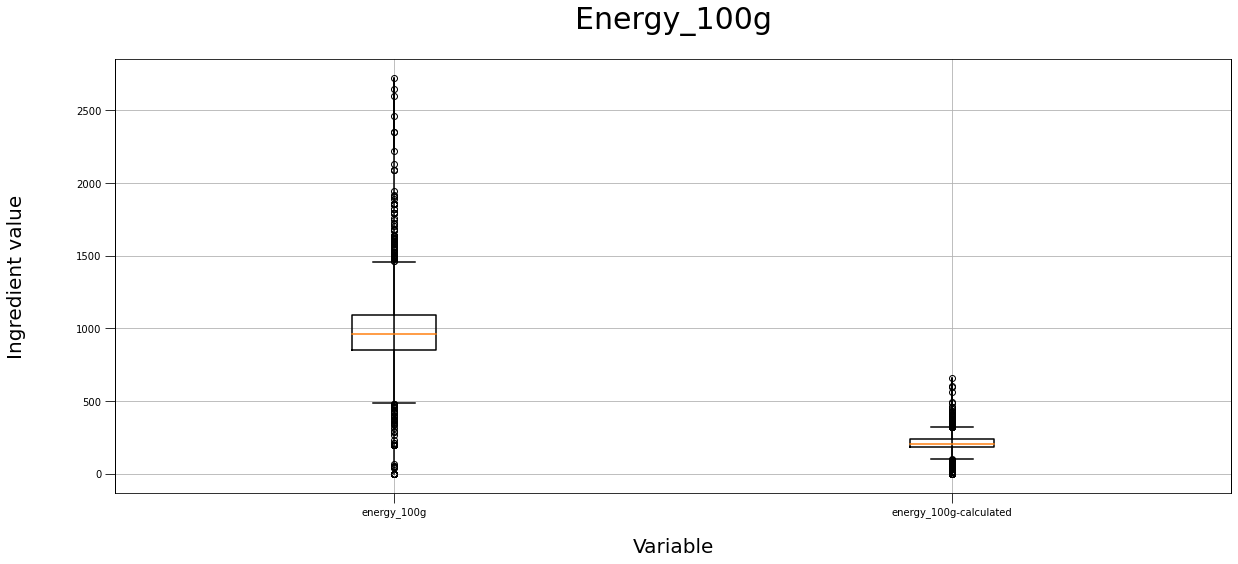

In [32]:
# plot des colonnes liees a la variable 'energy'
ax = energy_calc.plot(kind='box',
             color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=True, grid=True, rot=0, figsize = (20,8))
# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both',size=10 )  # 'both' refers to minor and major axes
# set labels 
ax.set_title("Energy_100g", fontsize=30, color='black',pad=30)
ax.set_xlabel('Variable', fontsize=20, color='black',rotation=0)
ax.yaxis.labelpad = 50
ax.xaxis.labelpad = 20
ax.title.labelpad = 100
ax.set_ylabel('Ingredient value', fontsize=20, color='black')
plt.show()

In [33]:
# Definition d'une categorie de lignes avec aucune valeur nutritionelle ou energetique

In [34]:
df2.loc[(df2['energy_100g']==0)&(df2['energy_100g-calculated']==0)]

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,...,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g-calculated
151429,8.198930e+11,http://world-fr.openfoodfacts.org/produit/0819...,openfoodfacts-contributors,2013-12-15 01:18:43+00:00,2015-08-09 17:35:30+00:00,ice cream flavored bubble gum,target,united states,en:gum,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
174775,2.000435e+07,http://world-fr.openfoodfacts.org/produit/2000...,kiliweb,2017-03-06 14:20:42+00:00,2017-03-09 15:06:38+00:00,fresh & easy coffee ice cream,tante clara,france,en:pie-dough,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
176140,2.018020e+07,http://world-fr.openfoodfacts.org/produit/2018...,roft,2016-04-13 08:52:13+00:00,2016-04-13 08:53:01+00:00,gelatelli bourbon vanilla ice cream,not specified,ireland,not specified,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
214442,3.270161e+12,http://world-fr.openfoodfacts.org/produit/3270...,hystiff,2016-07-31 20:17:34+00:00,2016-07-31 22:16:14+00:00,les glaces à l'italienne - noisette,picard,france,not specified,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
225619,3.415581e+12,http://world-fr.openfoodfacts.org/produit/3415...,openfoodfacts-contributors,2014-03-18 18:04:10+00:00,2016-07-23 15:13:57+00:00,vanilla ice cream,häagen-dazs,ireland,en:ice-creams,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
247548,3.770001e+12,http://world-fr.openfoodfacts.org/produit/3770...,zuthos,2016-07-18 18:13:51+00:00,2016-07-18 18:40:58+00:00,les glaces du perche sarthois sorbet fraise,les glaces du perche sarthois,france,en:ice-creams,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
260160,5.000159e+12,http://world-fr.openfoodfacts.org/produit/5000...,kvliegen,2015-02-06 12:34:40+00:00,2015-02-06 12:35:07+00:00,mars ice cream,not specified,belgique,not specified,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
260162,5.000159e+12,http://world-fr.openfoodfacts.org/produit/5000...,kvliegen,2015-02-06 12:35:22+00:00,2016-01-27 10:11:48+00:00,snickers ice cream,not specified,belgique,not specified,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
260163,5.000159e+12,http://world-fr.openfoodfacts.org/produit/5000...,openfoodfacts-contributors,2016-09-17 20:11:51+00:00,2016-09-17 20:12:39+00:00,snickers ice cream,not specified,france,not specified,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
260221,5.000159e+12,http://world-fr.openfoodfacts.org/produit/5000...,openfoodfacts-contributors,2016-09-22 18:54:58+00:00,2016-09-22 18:54:58+00:00,ice cream,bounty,france,not specified,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


In [35]:
df2.loc[df2['energy_100g-calculated']==0]

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,...,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g-calculated
5697,1.115026e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 20:12:00+00:00,2017-03-09 20:12:00+00:00,ice cream cups,roundy's,united states,not specified,1858.0,...,0.0,88.89,0.0,0.0,0.0,0.28194,0.0,6.0,6.0,0.0
30053,3.582607e+10,http://world-fr.openfoodfacts.org/produit/0035...,usda-ndb-import,2017-03-09 20:16:28+00:00,2017-03-09 20:16:28+00:00,classics ice cream cones,food lion,united states,not specified,1858.0,...,0.0,88.89,0.0,0.0,0.0,0.28194,0.0,6.0,6.0,0.0
30054,3.582607e+10,http://world-fr.openfoodfacts.org/produit/0035...,usda-ndb-import,2017-03-09 20:16:27+00:00,2017-03-09 20:16:27+00:00,classic ice cream cone,"food lion, food town stores inc.",united states,not specified,1858.0,...,0.0,88.89,0.0,0.0,0.0,0.28194,0.0,6.0,6.0,0.0
41312,4.126815e+10,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,2017-03-09 20:17:59+00:00,2017-03-09 20:17:59+00:00,classic ice cream cones,"hannaford, hannaford bros. co.",united states,not specified,1858.0,...,0.0,88.89,0.0,0.0,0.0,0.28194,0.0,6.0,6.0,0.0
42645,4.129011e+10,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,2017-03-09 20:18:24+00:00,2017-03-09 20:18:27+00:00,ice cream color cups,piggly wiggly,united states,not specified,1858.0,...,0.0,88.89,0.0,0.0,0.0,0.28194,0.0,6.0,6.0,0.0
47860,4.149700e+10,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,2017-03-09 11:47:05+00:00,2017-03-09 11:47:05+00:00,"ice cream cups, crispy, flavorful tasting cake...",weis,united states,not specified,1858.0,...,0.0,88.89,0.0,0.0,0.0,0.28194,0.0,6.0,6.0,0.0
50544,4.149822e+10,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,2017-03-09 12:02:06+00:00,2017-03-09 12:02:06+00:00,ice cream cups,no manfacturer,united states,not specified,1858.0,...,0.0,88.89,0.0,0.0,0.0,0.28194,0.0,6.0,6.0,0.0
55735,4.318200e+10,http://world-fr.openfoodfacts.org/produit/0043...,usda-ndb-import,2017-03-09 09:56:48+00:00,2017-03-09 09:56:48+00:00,ice cream cones,edward & sons,united states,not specified,1674.0,...,0.0,66.67,0.0,0.0,0.0,0.33782,0.0,NaN,NaN,0.0
65446,5.568511e+10,http://world-fr.openfoodfacts.org/produit/0055...,usda-ndb-import,2017-03-10 08:47:06+00:00,2017-03-10 08:47:07+00:00,ice cream cups,paneriso,united states,not specified,1360.0,...,0.0,50.00,0.0,0.0,0.0,0.25400,0.0,5.0,5.0,0.0
65447,5.568511e+10,http://world-fr.openfoodfacts.org/produit/0055...,usda-ndb-import,2017-03-10 08:46:56+00:00,2017-03-10 08:46:56+00:00,sugar ice cream cones,paneriso foods,united states,not specified,1561.0,...,0.0,81.82,0.0,0.0,0.0,0.62230,0.0,NaN,NaN,0.0


In [36]:
df2.loc[df2['energy_100g']==0]

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,...,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g-calculated
2473,1.111053e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 14:39:45+00:00,2017-03-09 14:39:45+00:00,"deluxe churned light ice cream, blueberry pome...",kroger,united states,not specified,0.0,...,0.013,34.29,0.00,2.9,0.00,0.17526,0.0017,NaN,NaN,41.76
47722,4.148304e+10,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,2017-03-09 20:18:56+00:00,2017-03-09 20:18:56+00:00,reduced fat ice cream,kemps llc,united states,not specified,0.0,...,0.031,29.23,21.54,1.5,3.08,0.19558,0.0000,NaN,NaN,223.13
151429,8.198930e+11,http://world-fr.openfoodfacts.org/produit/0819...,openfoodfacts-contributors,2013-12-15 01:18:43+00:00,2015-08-09 17:35:30+00:00,ice cream flavored bubble gum,target,united states,en:gum,0.0,...,0.000,0.00,0.00,0.0,0.00,0.00000,0.0000,NaN,NaN,0.00
174775,2.000435e+07,http://world-fr.openfoodfacts.org/produit/2000...,kiliweb,2017-03-06 14:20:42+00:00,2017-03-09 15:06:38+00:00,fresh & easy coffee ice cream,tante clara,france,en:pie-dough,0.0,...,0.000,0.00,0.00,0.0,0.00,0.00000,0.0000,NaN,NaN,0.00
176140,2.018020e+07,http://world-fr.openfoodfacts.org/produit/2018...,roft,2016-04-13 08:52:13+00:00,2016-04-13 08:53:01+00:00,gelatelli bourbon vanilla ice cream,not specified,ireland,not specified,0.0,...,0.000,0.00,0.00,0.0,0.00,0.00000,0.0000,NaN,NaN,0.00
214442,3.270161e+12,http://world-fr.openfoodfacts.org/produit/3270...,hystiff,2016-07-31 20:17:34+00:00,2016-07-31 22:16:14+00:00,les glaces à l'italienne - noisette,picard,france,not specified,0.0,...,0.000,0.00,0.00,0.0,0.00,0.00000,0.0000,NaN,NaN,0.00
225619,3.415581e+12,http://world-fr.openfoodfacts.org/produit/3415...,openfoodfacts-contributors,2014-03-18 18:04:10+00:00,2016-07-23 15:13:57+00:00,vanilla ice cream,häagen-dazs,ireland,en:ice-creams,0.0,...,0.000,0.00,0.00,0.0,0.00,0.00000,0.0000,NaN,NaN,0.00
247548,3.770001e+12,http://world-fr.openfoodfacts.org/produit/3770...,zuthos,2016-07-18 18:13:51+00:00,2016-07-18 18:40:58+00:00,les glaces du perche sarthois sorbet fraise,les glaces du perche sarthois,france,en:ice-creams,0.0,...,0.000,0.00,0.00,0.0,0.00,0.00000,0.0000,NaN,NaN,0.00
260160,5.000159e+12,http://world-fr.openfoodfacts.org/produit/5000...,kvliegen,2015-02-06 12:34:40+00:00,2015-02-06 12:35:07+00:00,mars ice cream,not specified,belgique,not specified,0.0,...,0.000,0.00,0.00,0.0,0.00,0.00000,0.0000,NaN,NaN,0.00
260162,5.000159e+12,http://world-fr.openfoodfacts.org/produit/5000...,kvliegen,2015-02-06 12:35:22+00:00,2016-01-27 10:11:48+00:00,snickers ice cream,not specified,belgique,not specified,0.0,...,0.000,0.00,0.00,0.0,0.00,0.00000,0.0000,NaN,NaN,0.00


In [37]:
# On utilisera ces lignes a valeurs nulles pour l'application d'un exemple 'iterative imputer'

In [38]:
df2['energy_100g-calculated'] = np.where(df2['energy_100g-calculated']==0,np.nan, df2['energy_100g-calculated'])

<ipython-input-38-5dc0a6b17810>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['energy_100g-calculated'] = np.where(df2['energy_100g-calculated']==0,np.nan, df2['energy_100g-calculated'])


In [39]:
# verification des valeurs qu'on devra traiter avec l'algorithme iterative imputer
df2['energy_100g-calculated'].isna().sum()

38

In [40]:
list_ice = list(['energy_100g-calculated', 'fat_100g','cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'vitamin-c_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'])

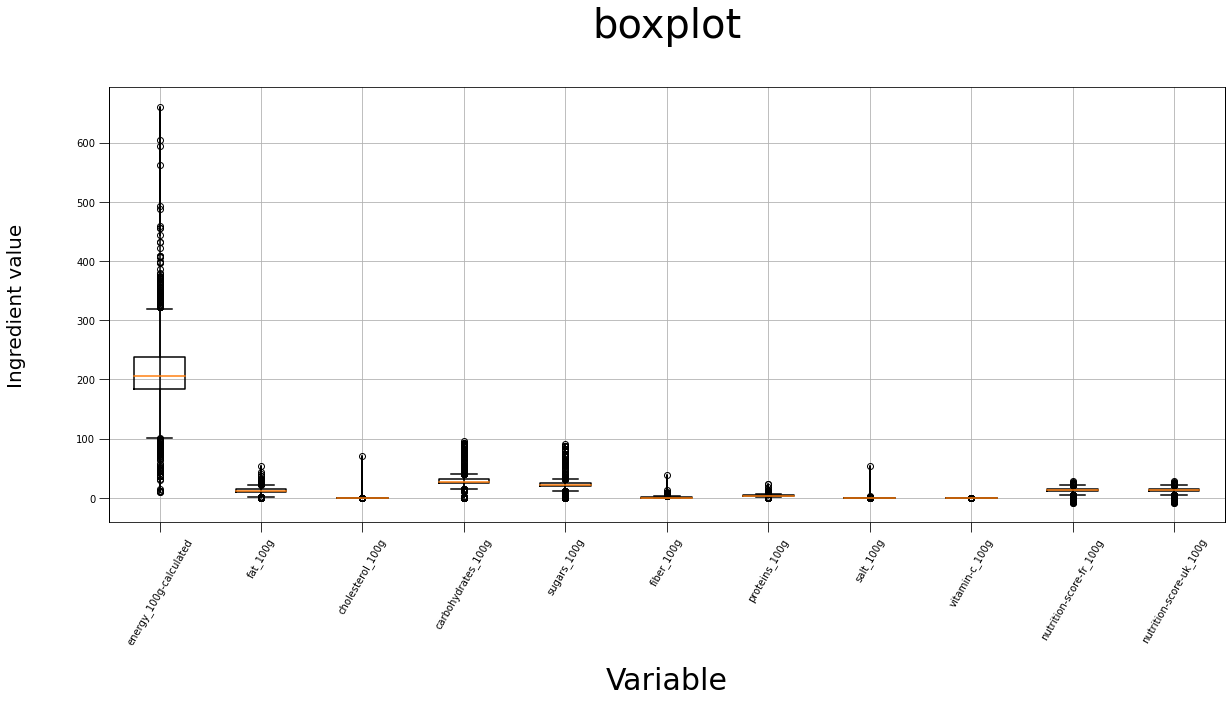

In [41]:
ax = df2[list_ice].plot(kind='box',
             color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=True, grid=True, rot=60, figsize = (20,8))
# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both',size=10 )  # 'both' refers to minor and major axes
# set labels 
ax.set_title("boxplot", fontsize=40, color='black',pad=50)
ax.set_xlabel('Variable', fontsize=30, color='black',rotation=0)
ax.yaxis.labelpad = 50
ax.xaxis.labelpad = 20
ax.title.labelpad = 100
ax.set_ylabel('Ingredient value', fontsize=20, color='black')
plt.show()

In [42]:
list_ice_no_energy = list(['fat_100g','cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'vitamin-c_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'])

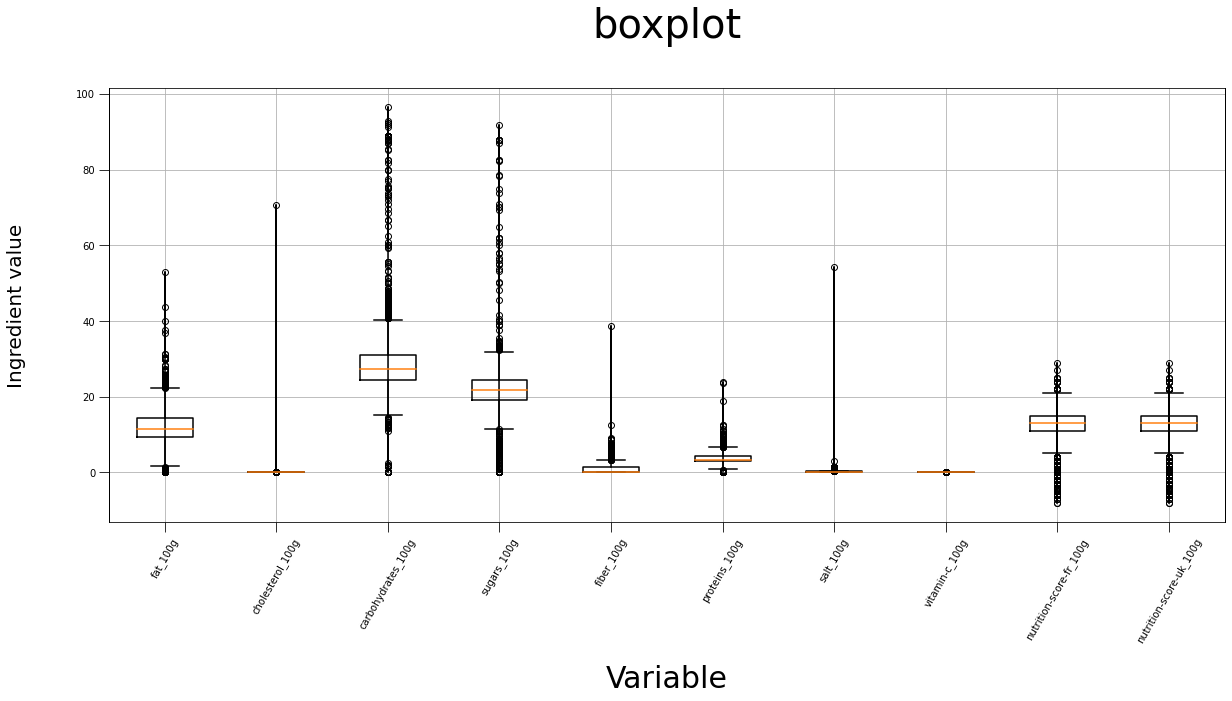

In [43]:
ax = df2[list_ice_no_energy].plot(kind='box',
             color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=True, grid=True, rot=60, figsize = (20,8))
# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both',size=10 )  # 'both' refers to minor and major axes
# set labels 
ax.set_title("boxplot", fontsize=40, color='black',pad=50)
ax.set_xlabel('Variable', fontsize=30, color='black',rotation=0)
ax.yaxis.labelpad = 50
ax.xaxis.labelpad = 20
ax.title.labelpad = 100
ax.set_ylabel('Ingredient value', fontsize=20, color='black')
plt.show()

In [44]:
# on se propose un traitement des valeurs aberrantes pour les colonnes 'fat' , 'carbohydrates', cholesterol', 'salt' 
#'sugars et 'fiber' ,'proteins'
# en doit etablir des valeurs limites pour chaque variable pour etablir un nettoyage clair et efficace

In [45]:
# Traitement de la colonne 'fat'
# 35 lignes presentent des valeurs superieures a 25g
# On utilisera le quantile 99% comme limite superieure
# pas de limite inferieure a utiliser vu que des produits sans gras ou avec des valeurs reduites sont tolerables

<AxesSubplot:xlabel='fat_100g'>

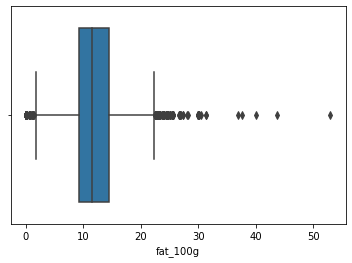

In [46]:
sns.boxplot(x=df2['fat_100g'])

In [47]:
df2[df2['fat_100g']>25]

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,...,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g-calculated
4171,1.111087e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 20:51:25+00:00,2017-03-09 20:51:25+00:00,ice cream bars,private selection,united states,not specified,1761.0,...,0.021,36.84,32.63,1.0,4.21,0.09398,0.0,21.0,21.0,422.13
6085,1.115059e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 09:40:18+00:00,2017-03-09 09:40:18+00:00,ice cream bars,roundy's,united states,not specified,1795.0,...,0.026,36.36,31.17,2.6,3.90,0.29718,0.0,19.0,19.0,409.11
15830,2.065200e+10,http://world-fr.openfoodfacts.org/produit/0020...,usda-ndb-import,2017-03-09 20:13:22+00:00,2017-03-09 20:13:23+00:00,ice cream,cedar crest,united states,not specified,1033.0,...,0.021,31.51,28.77,0.0,2.74,0.43434,0.0,16.0,16.0,397.30
36908,4.100041e+10,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,2017-03-10 08:43:23+00:00,2017-03-10 08:43:23+00:00,eggs ice cream cup,reese's,united states,not specified,1594.0,...,0.016,33.33,28.57,1.6,4.76,0.46482,0.0,20.0,20.0,361.92
47898,4.149701e+10,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,2017-03-09 11:45:50+00:00,2017-03-09 11:45:51+00:00,premium ice cream bars,weis quality,united states,not specified,1795.0,...,0.026,33.77,28.57,2.6,3.90,0.23114,0.0,19.0,19.0,398.71
52022,4.173508e+10,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,2017-03-10 08:45:14+00:00,2017-03-10 08:45:14+00:00,premium ice cream bars,central market,united states,not specified,1795.0,...,0.026,33.77,28.57,2.6,3.90,0.23114,0.0,19.0,19.0,398.71
58929,4.814330e+10,http://world-fr.openfoodfacts.org/produit/0048...,usda-ndb-import,2017-03-09 20:57:50+00:00,2017-03-09 20:57:50+00:00,neapolitan ice cream,astronaut,united states,not specified,2644.0,...,0.132,68.42,57.89,0.0,10.53,0.60198,0.0,29.0,29.0,605.24
71367,7.069027e+10,http://world-fr.openfoodfacts.org/produit/0070...,usda-ndb-import,2017-03-10 09:28:25+00:00,2017-03-10 09:28:26+00:00,"ice cream toppers, nut toppings","fisher, john b. sanfilippo & son inc.",united states,not specified,2460.0,...,0.000,23.53,5.88,5.9,23.53,0.74676,0.0,14.0,14.0,594.10
71368,7.069027e+10,http://world-fr.openfoodfacts.org/produit/0070...,usda-ndb-import,2017-03-09 13:12:51+00:00,2017-03-09 13:12:51+00:00,"ice cream toppers, cinnamon pecans",fisher,united states,not specified,2351.0,...,0.000,50.00,50.00,6.2,6.25,0.39624,0.0,16.0,16.0,562.50
71399,7.069047e+10,http://world-fr.openfoodfacts.org/produit/0070...,usda-ndb-import,2017-03-10 09:27:50+00:00,2017-03-10 09:27:50+00:00,"ice cream toppers, frosty blast topper","fisher, john b. sanfilippo & son inc.",united states,not specified,2092.0,...,0.000,50.00,31.25,6.2,12.50,0.15748,0.0,16.0,16.0,456.25


In [48]:
fat_upper = df2['fat_100g'].quantile(.99)
fat_upper

25.49899999999999

In [49]:
# remplacement des valeurs aberrantes par la valeur 'fat upper'

In [50]:
df2['fat_100g']=np.where(df2['fat_100g']>fat_upper,fat_upper,df2['fat_100g'])

<ipython-input-50-d732facf9b1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fat_100g']=np.where(df2['fat_100g']>fat_upper,fat_upper,df2['fat_100g'])


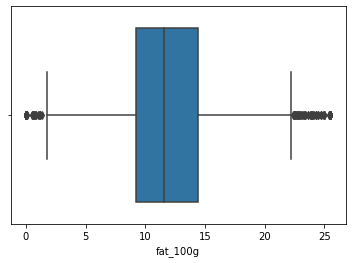

In [51]:
sns.boxplot(x=df2['fat_100g'])
plt.show()

In [52]:
# Traitement de la colonne cholesterol 

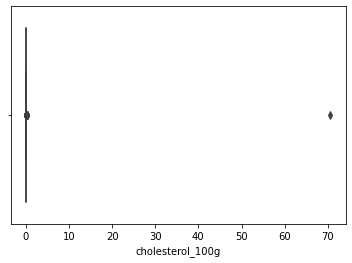

In [53]:
sns.boxplot(x=df2['cholesterol_100g'])
plt.show()

In [54]:
chol_upper = df2['cholesterol_100g'].quantile(.99)
chol_upper

0.105

In [55]:
df2['cholesterol_100g']=np.where(df2['cholesterol_100g']>chol_upper,chol_upper,df2['cholesterol_100g'])

<ipython-input-55-49405b9f736b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cholesterol_100g']=np.where(df2['cholesterol_100g']>chol_upper,chol_upper,df2['cholesterol_100g'])


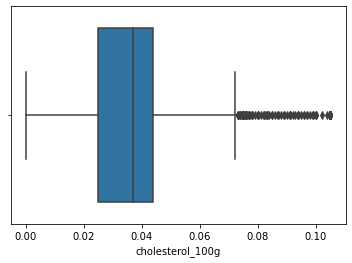

In [56]:
sns.boxplot(x=df2['cholesterol_100g'])
plt.show()

In [57]:
# Traitement de la colonne carbohydrates

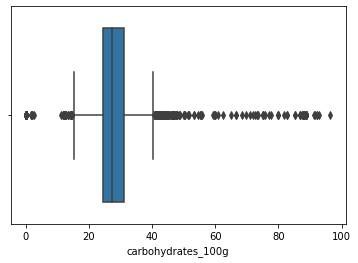

In [58]:
sns.boxplot(x=df2['carbohydrates_100g'])
plt.show()

In [59]:
# On utilisera la limite quantile 95% qui cadre mieux avec le schema graphique  
carb_upper = df2['carbohydrates_100g'].quantile(.95)
carb_upper

43.806999999999945

In [60]:
df2[df2['carbohydrates_100g']>43]

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,...,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g-calculated
1852,1.111002e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 14:43:14+00:00,2017-03-09 14:43:14+00:00,"ice cream sandwiches, mint chocolate chips","kroger, the kroger co.",united states,not specified,1197.0,...,0.024,46.03,22.22,1.6,4.76,0.56388,0.0,12.0,12.0,193.60
2264,1.111046e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-10 08:11:02+00:00,2017-03-10 08:11:02+00:00,white ice cream cone cake,kroger,united states,not specified,1820.0,...,0.029,62.35,48.24,1.2,3.53,1.01600,0.0,22.0,22.0,387.08
2505,1.111058e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 14:43:16+00:00,2017-03-09 14:43:16+00:00,"ice cream sammies sandwiches, vanilla","kroger, the kroger co.",united states,not specified,1130.0,...,0.032,44.44,20.63,1.6,4.76,0.60452,0.0,12.0,12.0,187.24
2506,1.111058e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 20:51:13+00:00,2017-03-09 20:51:13+00:00,ice cream sandwich,the kroger co.,united states,not specified,1130.0,...,0.032,44.44,20.63,1.6,4.76,0.60452,0.0,12.0,12.0,187.24
2509,1.111058e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 14:43:16+00:00,2017-03-09 14:43:16+00:00,"ice cream sammies sandwich, chocolate chip, va...","kroger, the kroger co.",united states,not specified,1197.0,...,0.024,46.03,19.05,1.6,4.76,0.60452,0.0,11.0,11.0,180.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168928,8.867860e+11,http://world-fr.openfoodfacts.org/produit/0886...,usda-ndb-import,2017-03-09 15:57:50+00:00,2017-03-09 15:57:51+00:00,"mike and lke, chewy fruit candies, vanilla ice...",peeps & company,united states,not specified,1494.0,...,0.000,88.10,61.90,0.0,0.00,0.15240,0.0,14.0,14.0,247.60
171598,8.970640e+11,http://world-fr.openfoodfacts.org/produit/0897...,usda-ndb-import,2017-03-09 16:40:09+00:00,2017-03-09 16:40:09+00:00,peach ice cream topping,nine sons rising,united states,not specified,837.0,...,0.000,53.33,53.33,0.0,0.00,0.00000,0.0,12.0,12.0,213.32
218248,3.292591e+12,http://world-fr.openfoodfacts.org/produit/3292...,kiliweb,2017-04-17 14:22:22+00:00,2017-04-17 14:22:29+00:00,8 mochis glaces,thiriet,france,not specified,1025.0,...,0.000,44.50,29.70,1.2,1.00,0.04000,0.0,13.0,13.0,183.10
262364,5.030101e+12,http://world-fr.openfoodfacts.org/produit/5030...,tacinte,2015-09-05 13:18:44+00:00,2015-09-06 17:18:56+00:00,the sprinkles factory classic ice cream,the sprinkles factory,royaume-uni,en:edible-decorations,1946.0,...,0.000,75.60,69.20,1.3,3.90,0.30000,0.0,24.0,24.0,432.80


In [61]:
df2['carbohydrates_100g']=np.where(df2['carbohydrates_100g']>carb_upper,carb_upper,df2['carbohydrates_100g'])

<ipython-input-61-f508abddf977>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['carbohydrates_100g']=np.where(df2['carbohydrates_100g']>carb_upper,carb_upper,df2['carbohydrates_100g'])


In [62]:
df2['carbohydrates_100g'].max()

43.806999999999945

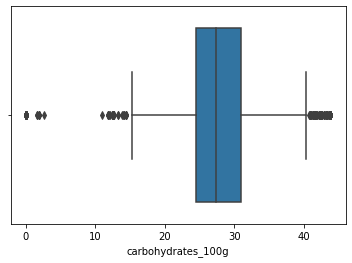

In [63]:
sns.boxplot(x=df2['carbohydrates_100g'])
plt.show()

In [64]:
# traitement de la colonne salt 

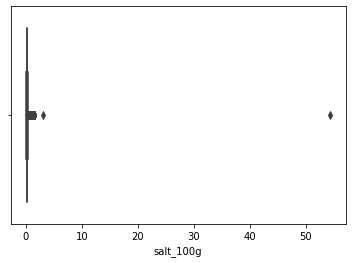

In [65]:
sns.boxplot(x=df2['salt_100g'])
plt.show()

In [66]:
# On utilisera la limite quantile 99% qui cadre mieux avec le schema graphique  
salt_upper = df2['salt_100g'].quantile(.99)
salt_upper

0.8850883999999942

In [67]:
# Remplacement des outliers

In [68]:
df2['salt_100g']=np.where(df2['salt_100g']>salt_upper,salt_upper,df2['salt_100g'])

<ipython-input-68-326c6092e19d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['salt_100g']=np.where(df2['salt_100g']>salt_upper,salt_upper,df2['salt_100g'])


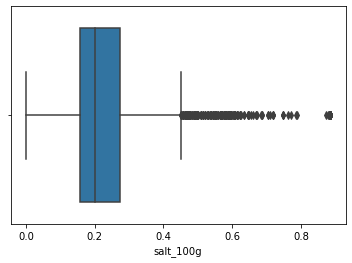

In [69]:
sns.boxplot(x=df2['salt_100g'])
plt.show()

In [70]:
# Traitement de la colonne 'sugars'

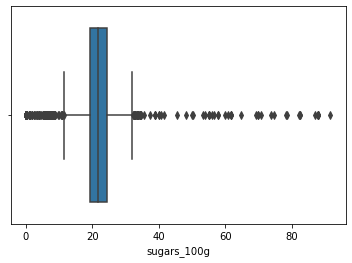

In [71]:
sns.boxplot(x=df2['sugars_100g'])
plt.show()

In [72]:
sugar_upper = df2['sugars_100g'].quantile(.99)
sugar_upper

53.36119999999997

In [73]:
# Remplacement des outliers

In [74]:
df2['sugars_100g']=np.where(df2['sugars_100g']>sugar_upper,sugar_upper,df2['sugars_100g'])

<ipython-input-74-a2a1fb9ab606>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sugars_100g']=np.where(df2['sugars_100g']>sugar_upper,sugar_upper,df2['sugars_100g'])


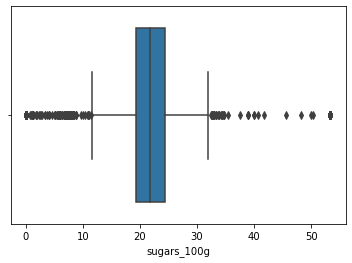

In [75]:
sns.boxplot(x=df2['sugars_100g'])
plt.show()

In [76]:
# Traitement de la colonne ' fiber '

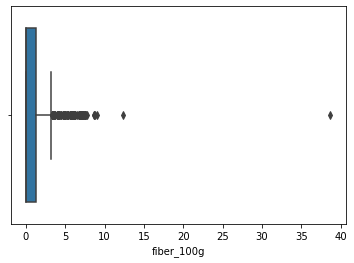

In [77]:
sns.boxplot(x=df2['fiber_100g'])
plt.show()

In [78]:
fiber_upper = df2['fiber_100g'].quantile(.99)
fiber_upper

6.8

In [79]:
df2['fiber_100g']=np.where(df2['fiber_100g']>fiber_upper,fiber_upper,df2['fiber_100g'])

<ipython-input-79-4c4bd08ad688>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fiber_100g']=np.where(df2['fiber_100g']>fiber_upper,fiber_upper,df2['fiber_100g'])


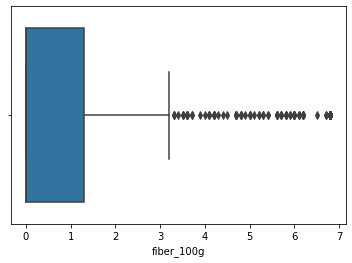

In [80]:
sns.boxplot(x=df2['fiber_100g'])
plt.show()

In [81]:
# Traitement de la colonne 'proteins '

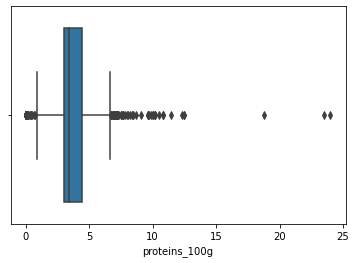

In [82]:
sns.boxplot(x=df2['proteins_100g'])
plt.show()

In [83]:
prot_upper = df2['proteins_100g'].quantile(.99)
prot_upper

7.69

In [84]:
df2['proteins_100g']=np.where(df2['proteins_100g']>prot_upper,prot_upper,df2['proteins_100g'])

<ipython-input-84-54cbbb5d018a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['proteins_100g']=np.where(df2['proteins_100g']>prot_upper,prot_upper,df2['proteins_100g'])


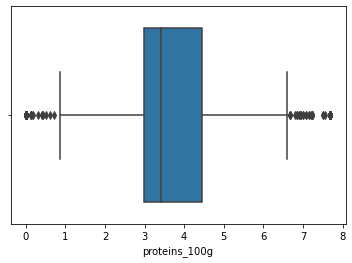

In [85]:
sns.boxplot(x=df2['proteins_100g'])
plt.show()

In [86]:
df2.describe()

,code,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,energy_100g-calculated
count,3.195000e+03,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3159.000000,3159.000000,3157.000000
mean,3.641907e+11,975.589671,11.698954,0.036359,28.099186,21.575555,0.697437,3.624883,0.235657,0.000692,12.606521,12.606521,209.864156
std,1.047458e+12,256.202851,4.931286,0.019410,6.822569,6.427879,1.230215,1.238744,0.136872,0.002811,4.262221,4.262221,56.457014
min,3.003400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,-8.000000,9.320000
25%,4.126816e+10,849.000000,9.230000,0.025000,24.490000,19.230000,0.000000,2.990000,0.157480,0.000000,11.000000,11.000000,183.090000
50%,7.089303e+10,958.000000,11.540000,0.037000,27.360000,21.800000,0.000000,3.410000,0.200660,0.000000,13.000000,13.000000,206.040000
75%,8.685403e+10,1092.000000,14.450000,0.044000,30.930000,24.405000,1.300000,4.440000,0.274320,0.000000,15.000000,15.000000,238.050000
max,9.414897e+12,2720.000000,25.499000,0.105000,43.807000,53.361200,6.800000,7.690000,0.885088,0.050800,29.000000,29.000000,660.000000


In [87]:
# application de la methodes 'iterative imputer'

In [88]:
list_impute =  ['fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'vitamin-c_100g',
       'energy_100g-calculated']

In [89]:
df2['energy_100g-calculated'].isna().sum()

38

In [90]:
from sklearn.experimental import enable_iterative_imputer

In [91]:
from sklearn.impute import IterativeImputer

In [92]:
# Iterative imputer method 
# remplacement des valeurs manquantes de la colonne 'energy'- calculated
# Le principe de 'ierative imputer' serait d'utiliser les correlations possibles entre la valeur la colonne ou il y'a
# valeurs manquantes et les autres colonnes du dataset dans une approche multivariee
# sikitlearn entraine un modele a regression utilisant les colonnes considerees comme 'features' et pour les lignes 
# ou la cible est manquante, les data 'features' des lignes seront utilisees pour predire la valeur manquante cible
# On va utiliser les colonnes 'sugars' et 'fat' comme colonnes features
# le tunning et l'evaluation du modele choisit ne sera pas traite dans ce projet 

In [93]:
# estimator default=BayesianRidge()
itr = IterativeImputer()

In [94]:
df2[['sugars_100g','fat_100g','energy_100g-calculated']] = itr.fit_transform(df2[['sugars_100g','fat_100g','energy_100g-calculated']])

<ipython-input-94-ddc343eeaf57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['sugars_100g','fat_100g','energy_100g-calculated']] = itr.fit_transform(df2[['sugars_100g','fat_100g','energy_100g-calculated']])
C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [95]:
df2['energy_100g-calculated'].isna().sum()

0

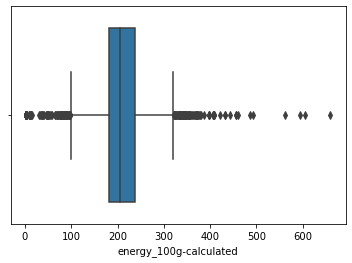

In [96]:
sns.boxplot(x=df2['energy_100g-calculated'])
plt.show()

In [97]:
# utilisation de la methode iterative imputer pour calculer le nutriscore 

In [98]:
df2.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'brands', 'countries', 'main_category', 'energy_100g',
       'fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'vitamin-c_100g',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g',
       'energy_100g-calculated'],
      dtype='object')

In [99]:
df2['nutrition-score-fr_100g'].isna().sum()

36

In [100]:
# Sauvegarde du dataset df2 

In [101]:
df3=df2

In [102]:
df3[['sugars_100g','fat_100g','proteins_100g','nutrition-score-fr_100g']] = itr.fit_transform(df3[['sugars_100g','fat_100g','proteins_100g','nutrition-score-fr_100g']])

<ipython-input-102-aa145faa4e87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['sugars_100g','fat_100g','proteins_100g','nutrition-score-fr_100g']] = itr.fit_transform(df3[['sugars_100g','fat_100g','proteins_100g','nutrition-score-fr_100g']])
C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [103]:
df3['nutrition-score-fr_100g'].isna().sum()

0

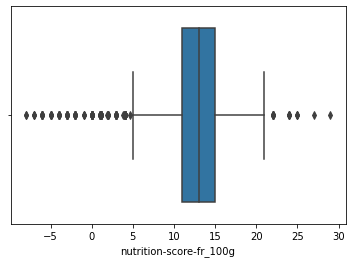

In [104]:
sns.boxplot(x=df3['nutrition-score-fr_100g'])
plt.show()

In [105]:
df3.drop(['nutrition-score-uk_100g'],axis=1,inplace=True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#  Graphiques et analyse statistiques 

In [106]:
# Analyses unvariees :
# Chaque variable est explore toute seule
# les variables categoriques : on utilise les 'frequency distribution plot' tel que : Bar ou Pie charts
# le variables numeriques : on mesure la 'centrale tendency : mean, media, mode' et le 'spread : variance , standard deviation ...' 

In [107]:
df3.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'brands', 'countries', 'main_category', 'energy_100g',
       'fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'vitamin-c_100g',
       'nutrition-score-fr_100g', 'energy_100g-calculated'],
      dtype='object')

In [108]:
df3['created_datetime']=pd.to_datetime(df3['created_datetime'])
df3['last_modified_datetime']=pd.to_datetime(df3['last_modified_datetime'])

<ipython-input-108-340dbc6a2978>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['created_datetime']=pd.to_datetime(df3['created_datetime'])
<ipython-input-108-340dbc6a2978>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['last_modified_datetime']=pd.to_datetime(df3['last_modified_datetime'])


In [109]:
list_no_code = ['fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'vitamin-c_100g',
       'nutrition-score-fr_100g',
       'energy_100g-calculated']

In [110]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3195 entries, 280 to 302677
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   code                     3195 non-null   float64            
 1   url                      3195 non-null   object             
 2   creator                  3195 non-null   object             
 3   created_datetime         3195 non-null   datetime64[ns, UTC]
 4   last_modified_datetime   3195 non-null   datetime64[ns, UTC]
 5   product_name             3195 non-null   object             
 6   brands                   3195 non-null   object             
 7   countries                3195 non-null   object             
 8   main_category            3195 non-null   object             
 9   energy_100g              3195 non-null   float64            
 10  fat_100g                 3195 non-null   float64            
 11  cholesterol_100g         3

In [111]:
df3[list_no_code].describe()

,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,energy_100g-calculated
count,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000
mean,11.698954,0.036359,28.099186,21.575555,0.697437,3.624883,0.235657,0.000692,12.536490,207.390639
std,4.931286,0.019410,6.822569,6.427879,1.230215,1.238744,0.136872,0.002811,4.351003,60.480847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,1.893475
25%,9.230000,0.025000,24.490000,19.230000,0.000000,2.990000,0.157480,0.000000,11.000000,181.605000
50%,11.540000,0.037000,27.360000,21.800000,0.000000,3.410000,0.200660,0.000000,13.000000,205.820000
75%,14.450000,0.044000,30.930000,24.405000,1.300000,4.440000,0.274320,0.000000,15.000000,237.340000
max,25.499000,0.105000,43.807000,53.361200,6.800000,7.690000,0.885088,0.050800,29.000000,660.000000


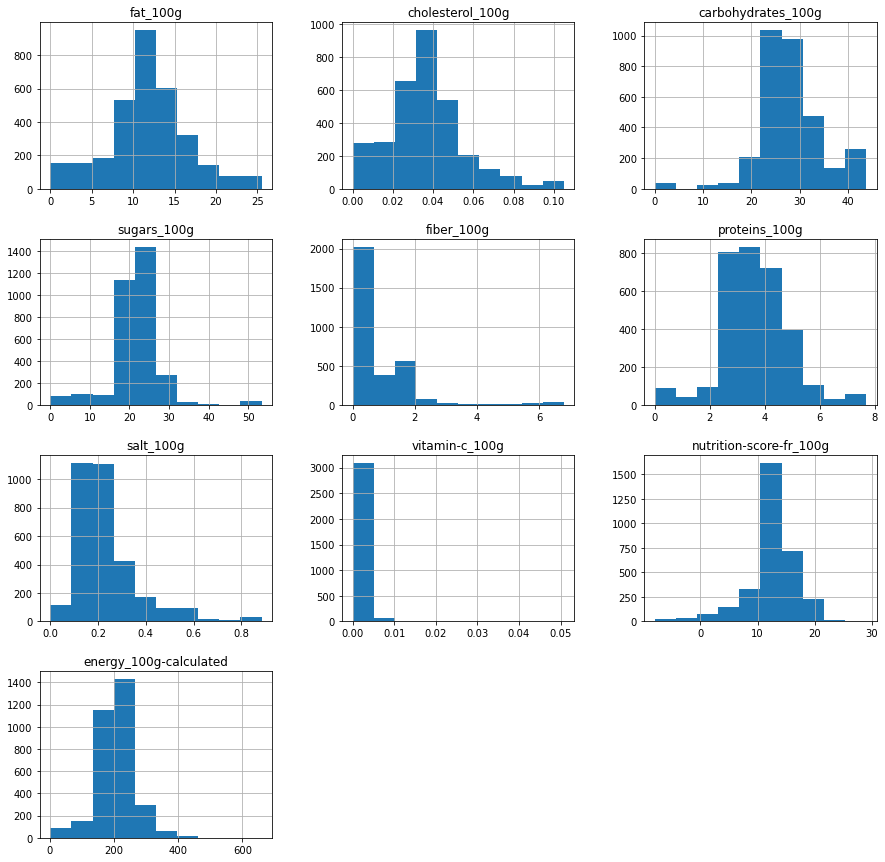

In [112]:
# Histogramme des distributions de valeurs des varibales ci dessous
df3[list_no_code].hist(figsize=(15,15))
plt.show()

In [113]:
# Creation d'une colonne avec l'annee d'introduction des data pour evaluer l'activite 'input'
# dans la databanque par annee

In [114]:
df['created_datetime'].min()

'0.013353142257145312'

In [115]:
df['created_datetime'].max()

'5.998616207438918'

In [116]:
df4=df3

In [117]:
df4['year']=df4['created_datetime'].dt.year

<ipython-input-117-22db580b5567>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['year']=df4['created_datetime'].dt.year


In [118]:
# Evaluation de l'activite 'input de donnees' dans le dataset 
df4['year'].value_counts()

2017    3147
2016      23
2015      15
2014       6
2013       3
2012       1
Name: year, dtype: int64

In [119]:
df4['year'].value_counts()

2017    3147
2016      23
2015      15
2014       6
2013       3
2012       1
Name: year, dtype: int64

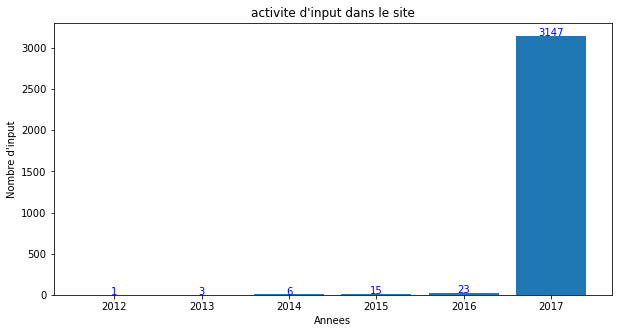

In [120]:
# function to add value labels
def addlabels(x,y):
	for i in range(len(x)):
		plt.text(i, y[i], y[i], ha = 'center',color = 'blue')

if __name__ == '__main__':
	
	# creating data on which bar chart will be plot
	x = ["2012", "2013",
		"2014", "2015", "2016",
		"2017"]
	y = [1, 3, 6, 15,
		23, 3147]
	
	# setting figure size by using figure() function
	plt.figure(figsize = (10, 5))
	
	# making the bar chart on the data
	plt.bar(x, y)
	
	# calling the function to add value labels
	addlabels(x, y)
	
	# giving title to the plot
	plt.title("activite d'input dans le site")
	
	# giving X and Y labels
	plt.xlabel("Annees")
	plt.ylabel("Nombre d'input")
	
	# visualizing the plot
	plt.show()


In [121]:
# Evaluation de l'activite de modification des donnees introduites
# on cree une colonne 

In [122]:
df3['delta_time'] = df3['last_modified_datetime']-df3['created_datetime']

<ipython-input-122-9e5390a27672>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['delta_time'] = df3['last_modified_datetime']-df3['created_datetime']


In [123]:
df3['delta_time'].value_counts()

0 days 00:00:00      2229
0 days 00:00:01       862
0 days 00:00:02        11
0 days 00:00:03         6
0 days 00:00:05         6
                     ... 
27 days 19:49:36        1
9 days 08:06:49         1
857 days 21:09:47       1
8 days 15:46:08         1
585 days 00:41:27       1
Name: delta_time, Length: 79, dtype: int64

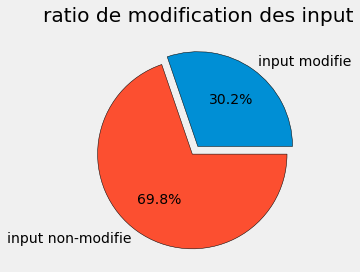

In [124]:
# utilisation d'une pieplot pour la representation du taux de modification des input
plt.style.use('fivethirtyeight')
slices = [(df3[df3['delta_time']>'0'].shape[0]),df3[df3['delta_time']=='0'].shape[0]]
explode = [0,0.1]
labels = ['input modifie', 'input non-modifie']
plt.pie(slices, labels=labels, wedgeprops={'edgecolor':'black'},explode = explode, shadow=False, autopct='%1.1f%%')
plt.title('ratio de modification des input')
plt.tight_layout()
plt.show()

In [125]:
## Affectation des categories du nutriscore avec la codification ALPHABETIQUE

In [126]:
df5=df4

In [127]:
condition = df5['nutrition-score-fr_100g']<0
df5.loc[condition,'nutri-score-cat']='A'
condition_2 = ((df5['nutrition-score-fr_100g']>0)&(df5['nutrition-score-fr_100g']<=2))
df5.loc[condition_2,'nutri-score-cat']='B'
condition_3 = ((df5['nutrition-score-fr_100g']>=3)&(df5['nutrition-score-fr_100g']<=10))
df5.loc[condition_3,'nutri-score-cat']='C'
condition_4 = ((df5['nutrition-score-fr_100g']>=11)&(df5['nutrition-score-fr_100g']<=18))
df5.loc[condition_4,'nutri-score-cat']='D'
condition_5 = df5['nutrition-score-fr_100g']>=19
df5.loc[condition_5,'nutri-score-cat']='E'

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [128]:
df5['nutri-score-cat'].value_counts()

D    2454
C     490
E     129
A      58
B      38
Name: nutri-score-cat, dtype: int64

In [129]:
list_nutri = tuple(df5['nutri-score-cat'].value_counts())
list_nutri

(2454, 490, 129, 58, 38)

In [130]:
liste_nutri_ = tuple(df5['nutri-score-cat'].unique())
liste_nutri_

('D', 'B', 'C', 'E', nan, 'A')

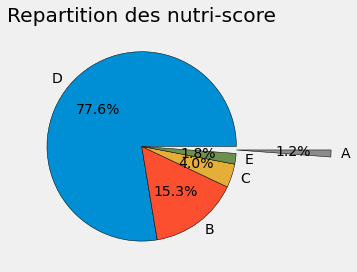

In [131]:
# Construction du graphique pour la repartition du nutriscore
plt.style.use('fivethirtyeight')
slices = [2480, 490, 129, 58, 38]
labels = ['D', 'B', 'C', 'E', 'A']
explode = [0,0,0,0,1]
plt.pie(slices, labels=labels, wedgeprops={'edgecolor':'black'},explode = explode,shadow=False, autopct='%1.1f%%' )
plt.title('Repartition des nutri-score')
plt.tight_layout()
plt.show()

In [132]:
# Representation graphique de la distribution des produits par pays

In [133]:
country_count.head()

,country,count
0,united states,3128
1,france,33
2,royaume-uni,4
3,suisse,27
4,allemagne,4


<ipython-input-134-c2507cc3497e>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.8))


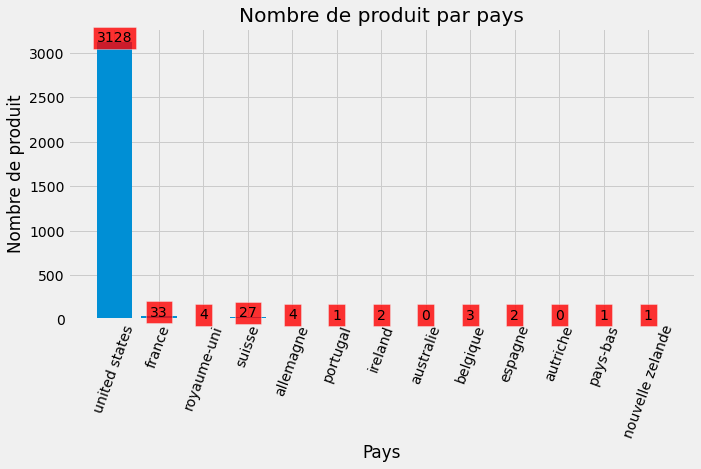

In [134]:
# function to add value labels
def addlabels(x,y):
	for i in range(len(x)):
		plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.8))

if __name__ == '__main__':
	
	# creating data on which bar chart will be plot
	x = country_count['country']
	y = country_count['count']
	
	# setting figure size by using figure() function
	plt.figure(figsize = (10, 5))
	
	# making the bar chart on the data
	plt.bar(x, y)
	
	# calling the function to add value labels
	addlabels(x, y)
	
	# giving title to the plot
	plt.title("Nombre de produit par pays")
	
	# giving X and Y labels
	plt.xlabel("Pays", rotation=0)
	plt.ylabel("Nombre de produit",rotation=90)
    
	plt.xticks(rotation=70)
	
	# visualizing the plot
	plt.show()

# Analyses bivariees : 

In [135]:
# creation de 2 colonnes d'appreciation pour les sucres et le gras

In [136]:
# colonne pour la classification par rapport a la quantite de sucre :
# =0 / Sans sucre
# <10 / Peu sucré
# >10 / Trop sucré

In [137]:
condition = df3['sugars_100g']==0
df3.loc[condition,'sugars_cat']='Sans sucré'
condition_s2 = (df3['sugars_100g']<10)&(df3['sugars_100g']>0)
df3.loc[condition_s2,'sugars_cat']='peu sucré'
condition_s3 = (df3['sugars_100g']>10)
df3.loc[condition_s3,'sugars_cat']='Très sucré'

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [138]:
df3['sugars_cat'].value_counts()

Très sucré    3021
peu sucré      130
Sans sucré      44
Name: sugars_cat, dtype: int64

In [139]:
# colonne pour la classification par rapport a la quantite de gras :
# =0 / Sans gras
# <10 / Peu gras
# >10 / Tres gras

In [140]:
condition = df3['fat_100g']==0
df3.loc[condition,'fat_cat']='Sans gras'
condition_s2 = (df3['fat_100g']<10)&(df3['fat_100g']>0)
df3.loc[condition_s2,'fat_cat']='peu gras'
condition_s3 = (df3['fat_100g']>10)
df3.loc[condition_s3,'fat_cat']='Très gras'

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [141]:
df3['fat_cat'].value_counts()

Très gras    2202
peu gras      834
Sans gras     118
Name: fat_cat, dtype: int64

# Combinaison numerique vs numerique : 

In [142]:
# Scatter plot entre la variable 'energy' et 'sucres'

<function matplotlib.pyplot.show(close=None, block=None)>

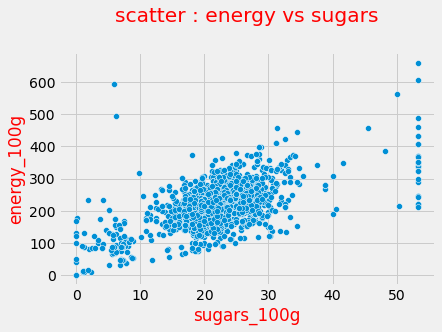

In [143]:
sns.scatterplot(x=df3['sugars_100g'],y=df3['energy_100g-calculated'])
#plt.figure(figsize=(20))
# set plot's title
plt.title('scatter : energy vs sugars',color='red',pad= 30)
# Set x-axis label
plt.xlabel('sugars_100g',color='red')
# Set y-axis label
plt.ylabel('energy_100g',color='red')
plt.show

In [144]:
# Relation entre le nutri-score et la valeur de l'energie

<function matplotlib.pyplot.show(close=None, block=None)>

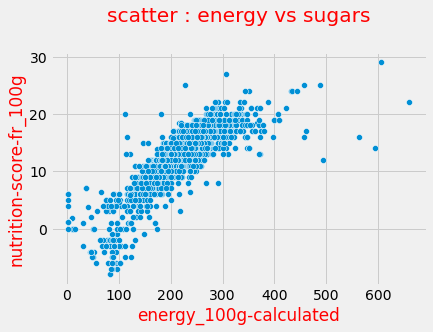

In [145]:
sns.scatterplot(x=df3['energy_100g-calculated'],y=df3['nutrition-score-fr_100g'])
#plt.figure(figsize=(20))
# set plot's title
plt.title('scatter : energy vs sugars',color='red',pad= 30)
# Set x-axis label
plt.xlabel('energy_100g-calculated',color='red')
# Set y-axis label
plt.ylabel('nutrition-score-fr_100g',color='red')
plt.show

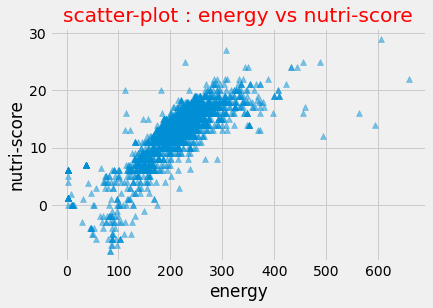

In [146]:
plt.scatter(df3['energy_100g-calculated'],df3['nutrition-score-fr_100g'],marker='^',alpha=0.5)
#plt.legend()

#bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#plt.text(100, 10, "Sample A", ha="right", va="top", size=10,
#        bbox=bbox_props)

#bbox_props = dict(boxstyle="rarrow", fc=(0.8, 0.9, 0.9), ec="b", lw=2)
#plt.text(200, 20, "Direction", ha="center", va="center", rotation=45,
#            size=15,
#            bbox=bbox_props)
plt.xlabel('energy')
plt.ylabel('nutri-score')
plt.title('scatter-plot : energy vs nutri-score', color='red')
plt.show()

# Combinaison categorique vs numerique : 

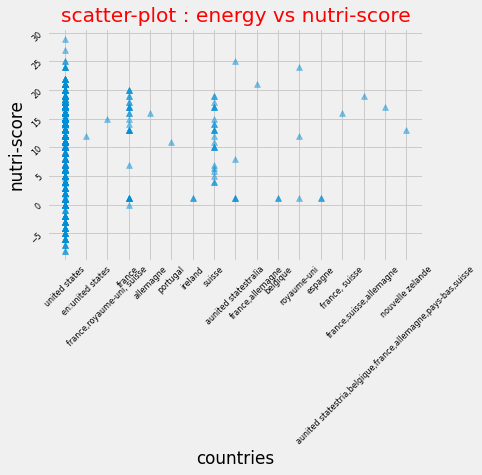

In [147]:
# ON observe la distribution du nutriscore selon les divers items dans la colonne 'countries'
plt.scatter(df3['countries'],df3['nutrition-score-fr_100g'],marker='^',alpha=0.5)
#plt.legend()

#bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#plt.text(100, 10, "Sample A", ha="right", va="top", size=10,
#       bbox=bbox_props)

#bbox_props = dict(boxstyle="rarrow", fc=(0.8, 0.9, 0.9), ec="b", lw=2)
#plt.text(200, 20, "Direction", ha="center", va="center", rotation=45,
#            size=15,
#            bbox=bbox_props)
figsize=(8,10)
plt.xlabel('countries')
plt.ylabel('nutri-score')
plt.tick_params(labelrotation=45, labelsize=8)
plt.title('scatter-plot : energy vs nutri-score', color='red')
plt.show()

# Combinaison categorique vs categorique : 

In [148]:
df3.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'brands', 'countries', 'main_category', 'energy_100g',
       'fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'vitamin-c_100g',
       'nutrition-score-fr_100g', 'energy_100g-calculated', 'year',
       'delta_time', 'nutri-score-cat', 'sugars_cat', 'fat_cat'],
      dtype='object')

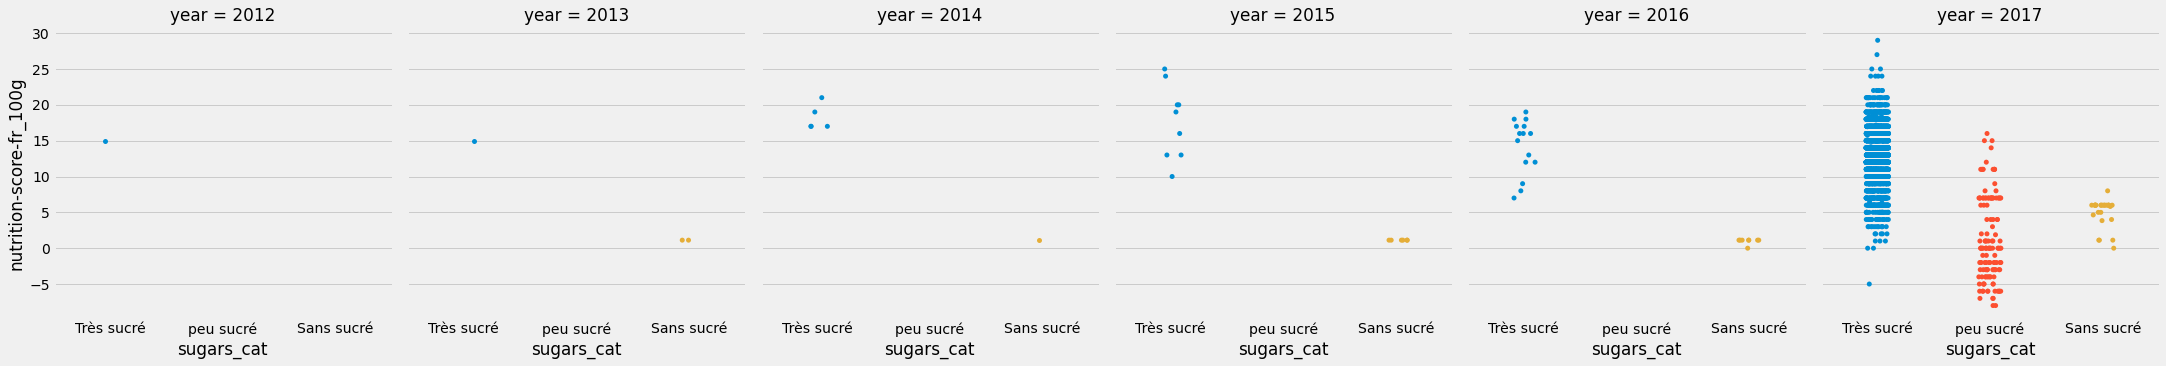

In [149]:
sns.catplot(x='sugars_cat',y='nutrition-score-fr_100g', data=df3,
           col='year',
           kind='strip');

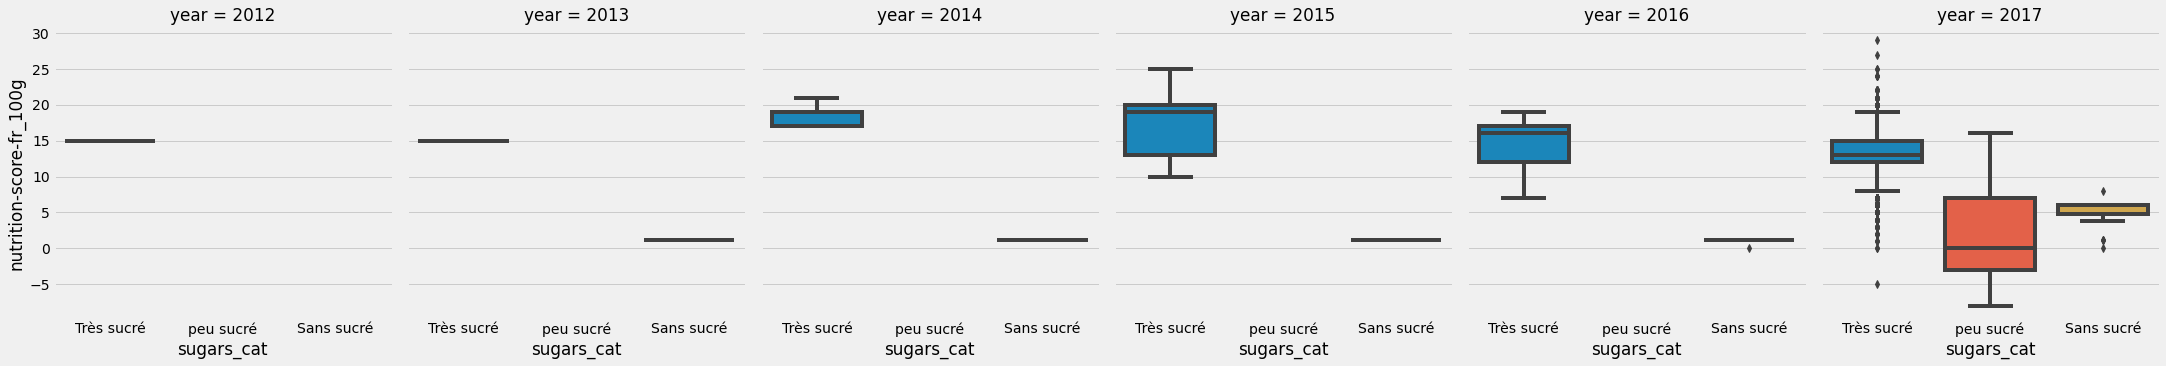

In [150]:
sns.catplot(x='sugars_cat',y='nutrition-score-fr_100g', data=df3,
           col='year',
           kind='box');

In [151]:
# Heat Maps (maps de correlations) :  

In [152]:
# Methode de 'pearson' : 
# Detail et principe de la methode : 

In [153]:
bivariate = df3.corr(method='pearson')
bivariate

,code,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,energy_100g-calculated,year
code,1.000000,-0.066874,-0.034478,-0.159405,-0.180979,-0.075086,-0.010955,-0.068767,-0.126913,0.015198,-0.054143,-0.057523,-0.404284
energy_100g,-0.066874,1.000000,0.647670,0.120117,0.582712,0.485606,0.085366,0.214966,0.260114,-0.156572,0.680889,0.765919,0.074161
fat_100g,-0.034478,0.647670,1.000000,0.468596,0.068683,0.228172,0.079039,0.288101,0.040628,-0.124467,0.719595,0.856088,0.055057
cholesterol_100g,-0.159405,0.120117,0.468596,1.000000,-0.234973,0.007653,-0.142881,0.180219,-0.138617,-0.045656,0.362890,0.333252,0.183076
carbohydrates_100g,-0.180979,0.582712,0.068683,-0.234973,1.000000,0.512017,0.135681,0.115850,0.407793,-0.100415,0.300504,0.306350,0.153801
sugars_100g,-0.075086,0.485606,0.228172,0.007653,0.512017,1.000000,-0.170352,0.035619,0.065529,-0.077284,0.622807,0.655568,0.076684
fiber_100g,-0.010955,0.085366,0.079039,-0.142881,0.135681,-0.170352,1.000000,0.384854,0.134433,0.064700,-0.357586,0.042230,0.041674
proteins_100g,-0.068767,0.214966,0.288101,0.180219,0.115850,0.035619,0.384854,1.000000,0.258824,-0.005787,0.017265,0.313835,0.086284
salt_100g,-0.126913,0.260114,0.040628,-0.138617,0.407793,0.065529,0.134433,0.258824,1.000000,-0.122360,0.165971,0.085550,0.063309
vitamin-c_100g,0.015198,-0.156572,-0.124467,-0.045656,-0.100415,-0.077284,0.064700,-0.005787,-0.122360,1.000000,-0.175611,-0.129513,0.022902


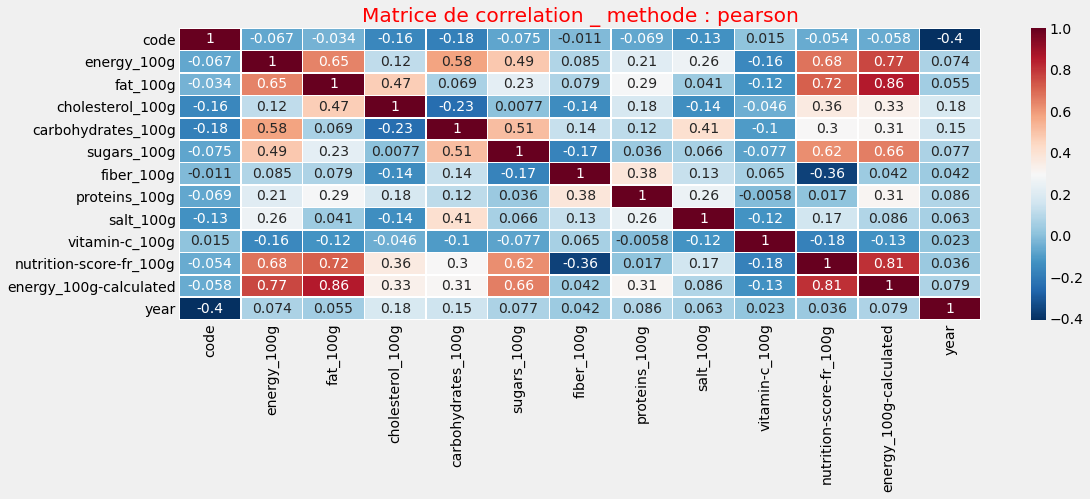

In [154]:
plt.figure(figsize = (16,5))
sns.heatmap(bivariate, 
            xticklabels=bivariate.columns,
            yticklabels=bivariate.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title('Matrice de correlation _ methode : pearson', color='red')
plt.show()

In [155]:
# Methode de 'kendall' : 
# Detail et principe de la methode : 

In [156]:
bivariate_01 = df3.corr(method='kendall')
bivariate_01

,code,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,energy_100g-calculated,year
code,1.000000,0.057054,0.098545,0.064120,-0.062375,0.009024,0.042999,0.005592,-0.100151,0.067420,0.073657,0.092870,-0.112316
energy_100g,0.057054,1.000000,0.587427,0.100454,0.360753,0.336049,0.201576,0.134499,0.225008,-0.104635,0.620568,0.697327,0.010452
fat_100g,0.098545,0.587427,1.000000,0.356971,-0.005562,0.127779,0.161313,0.139242,0.042801,-0.032552,0.577427,0.743744,0.032982
cholesterol_100g,0.064120,0.100454,0.356971,1.000000,-0.263927,-0.064411,-0.105535,0.072688,-0.110669,0.058916,0.241986,0.248113,0.152529
carbohydrates_100g,-0.062375,0.360753,-0.005562,-0.263927,1.000000,0.479309,0.144640,0.039285,0.325144,-0.116525,0.216753,0.165117,0.040107
sugars_100g,0.009024,0.336049,0.127779,-0.064411,0.479309,1.000000,0.019089,0.032862,0.142667,-0.030011,0.422743,0.379763,0.000335
fiber_100g,0.042999,0.201576,0.161313,-0.105535,0.144640,0.019089,1.000000,0.288916,0.128648,-0.025680,-0.063502,0.154743,0.044541
proteins_100g,0.005592,0.134499,0.139242,0.072688,0.039285,0.032862,0.288916,1.000000,0.208630,0.016231,0.036932,0.157589,0.049186
salt_100g,-0.100151,0.225008,0.042801,-0.110669,0.325144,0.142667,0.128648,0.208630,1.000000,-0.143272,0.150057,0.084777,0.068775
vitamin-c_100g,0.067420,-0.104635,-0.032552,0.058916,-0.116525,-0.030011,-0.025680,0.016231,-0.143272,1.000000,-0.058963,-0.039966,0.046196


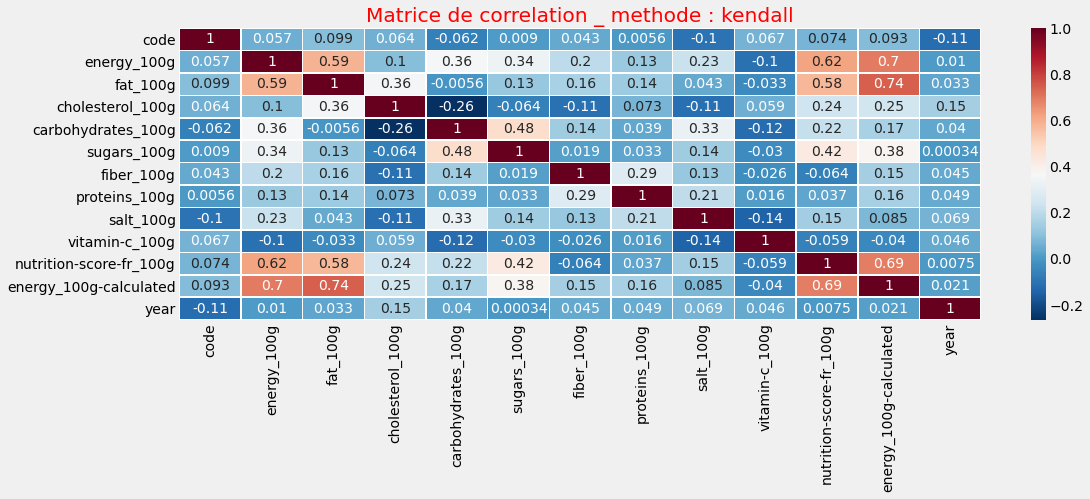

In [157]:
plt.figure(figsize = (16,5))
sns.heatmap(bivariate_01, 
            xticklabels=bivariate_01.columns,
            yticklabels=bivariate_01.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title('Matrice de correlation _ methode : kendall', color='red')
plt.show()

# Analyse multivariee : 

In [158]:
# On trace des graphiques avec la combinaison de plus de deux variables :

In [159]:
# combinaison des variables : sugars, fat, nutriscore, year

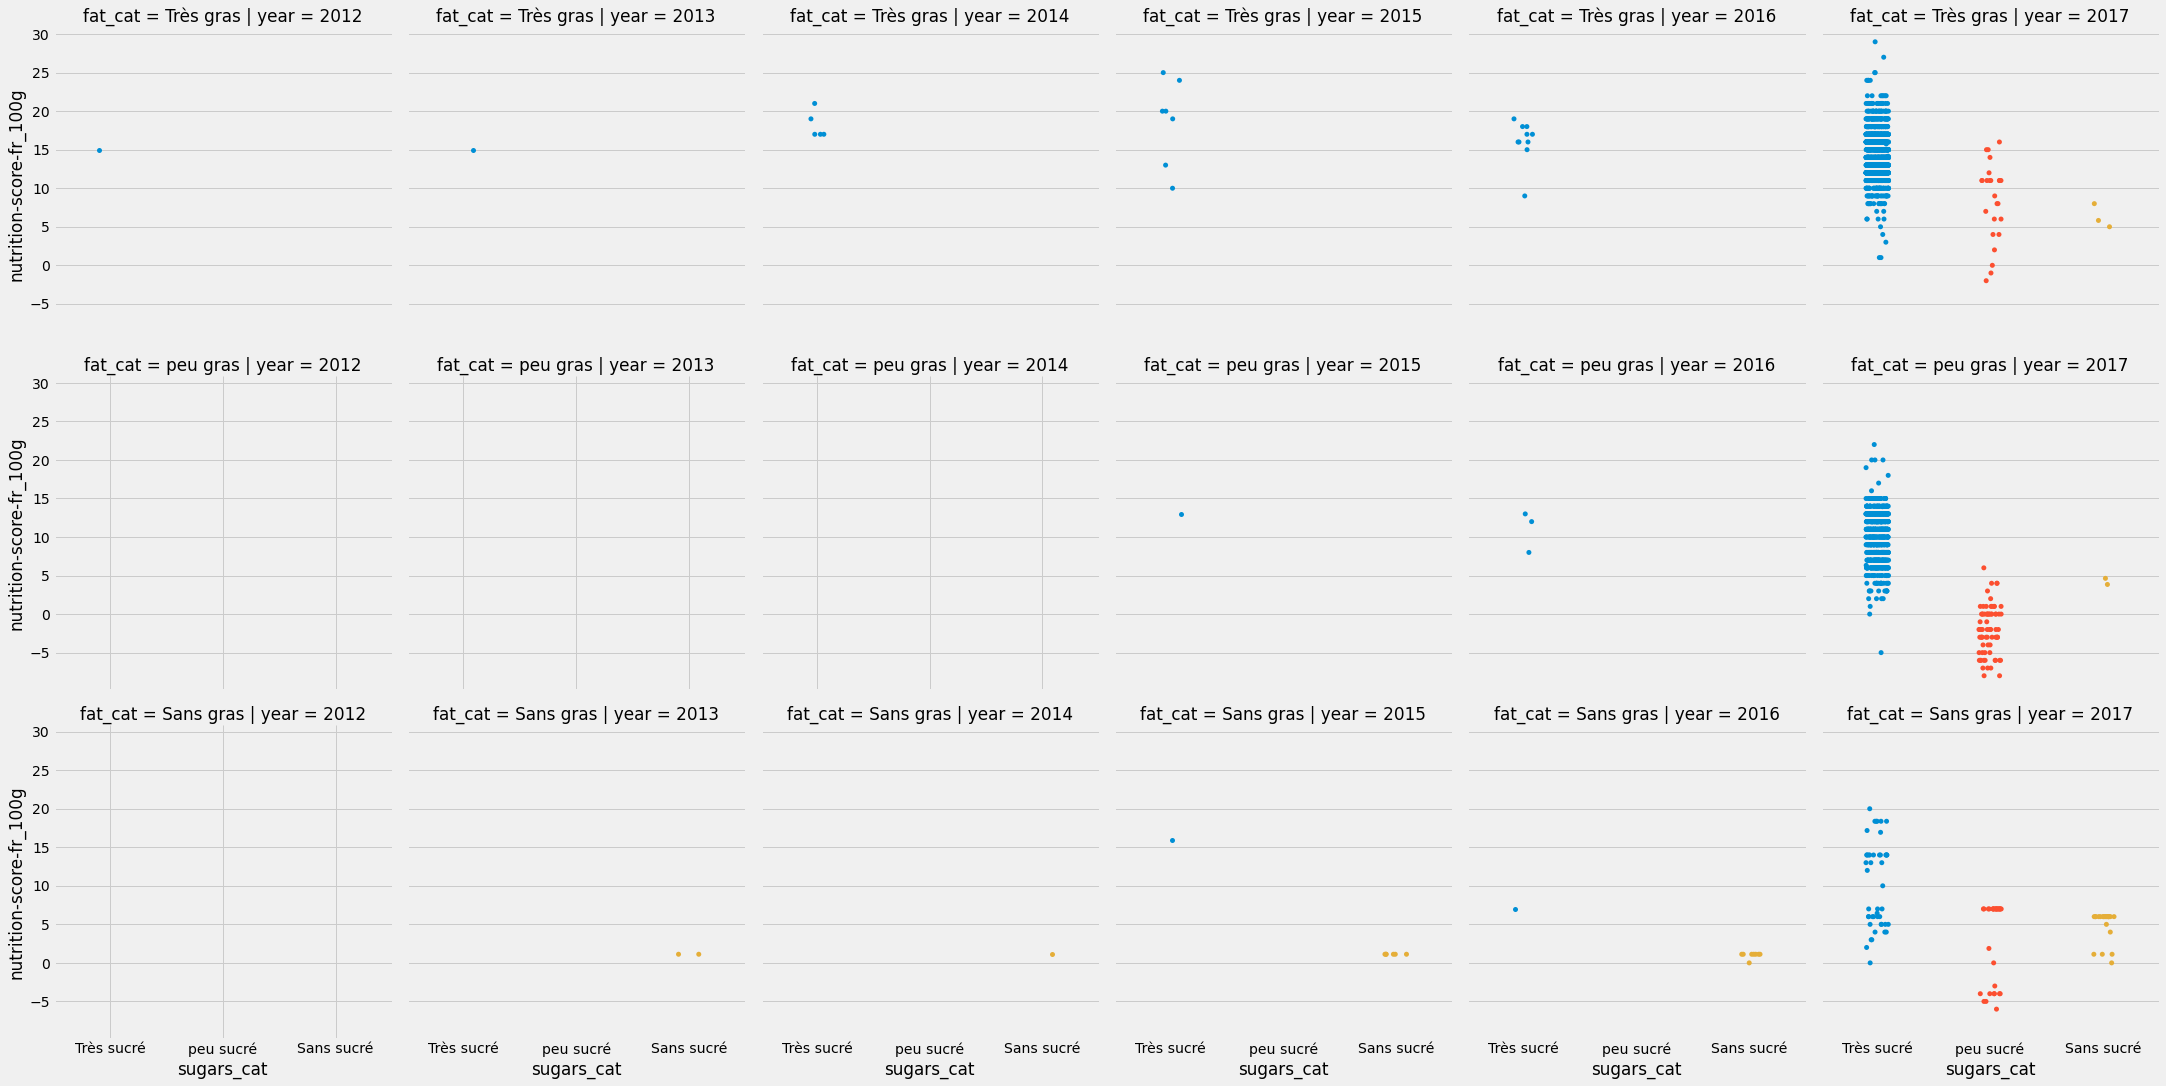

In [160]:
sns.catplot(x='sugars_cat',y='nutrition-score-fr_100g', data=df3,
           col='year',
            row='fat_cat',
           kind='strip');

In [161]:
# Analyse multivariee pour les variables : sugars, energy, fat

In [162]:
df3['fat_100g'].value_counts()

10.77    166
0.00     118
9.23     102
10.61     82
11.76     77
        ... 
2.27       1
11.03      1
0.81       1
21.15      1
4.88       1
Name: fat_100g, Length: 609, dtype: int64

In [163]:
df_fat_fixe = df3.loc[(df3['fat_100g']==10.77)|(df3['fat_100g']==0)|(df3['fat_100g']==9.23)]

<function matplotlib.pyplot.show(close=None, block=None)>

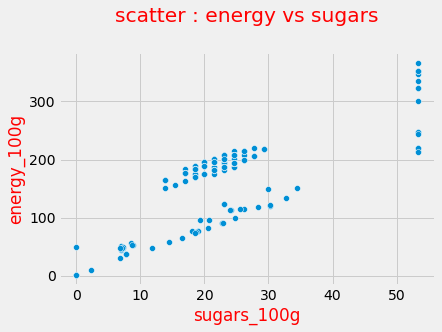

In [164]:
# Utilisation dans un cadre multivariable (ajout de la variable 'fat') pour essayer de comprendre la correlation
# On trace un scatter plot avec des valeurs fixees pour 'fat' dans le dataset global
sns.scatterplot(x=df_fat_fixe['sugars_100g'],y=df_fat_fixe['energy_100g-calculated'])
#plt.figure(figsize=(20))
# set plot's title
plt.title('scatter : energy vs sugars',color='red',pad= 30)
# Set x-axis label
plt.xlabel('sugars_100g',color='red')
# Set y-axis label
plt.ylabel('energy_100g',color='red')
plt.show

In [165]:
df_fat_nulle = df3.loc[(df3['fat_100g']==0)]

<function matplotlib.pyplot.show(close=None, block=None)>

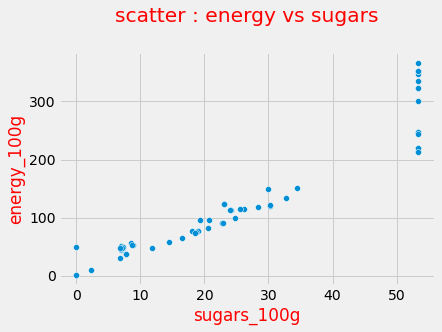

In [166]:
# Evaluation de la correlation entre variables
# il apparait que correlation interessante existe pour les valeurs de sugars < 40
# les valeurs audela de 40 semblent presenter une certaine anomalie , il se peut que la prediction effectuee avec 
# l'iterative imputer soit erronnee
sns.scatterplot(x=df_fat_nulle['sugars_100g'],y=df_fat_nulle['energy_100g-calculated'])
#plt.figure(figsize=(20))
# set plot's title
plt.title('scatter : energy vs sugars',color='red',pad= 30)
# Set x-axis label
plt.xlabel('sugars_100g',color='red')
# Set y-axis label
plt.ylabel('energy_100g',color='red')
plt.show

In [167]:
# Application de la methode ANOVA : 
# ANOVA = Analyse de la Variance

In [168]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [169]:
df3.head()

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,...,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,energy_100g-calculated,year,delta_time,nutri-score-cat,sugars_cat,fat_cat
280,4.501930e+08,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 09:47:41+00:00,2017-03-09 09:47:41+00:00,"ice cream, vanilla",lactaid,united states,not specified,883.0,...,2.82,0.14224,0.0000,12.0,180.31,2017,0 days,D,Très sucré,Très gras
281,4.501930e+08,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 10:49:03+00:00,2017-03-09 10:49:03+00:00,"ice cream, butter pecan",lactaid,united states,not specified,1000.0,...,4.23,0.34036,0.0000,12.0,218.29,2017,0 days,D,Très sucré,Très gras
1601,1.111000e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 14:26:10+00:00,2017-03-09 14:26:10+00:00,"ice cream, vanilla bean",private selection,united states,not specified,946.0,...,4.30,0.13716,0.0013,13.0,201.07,2017,0 days,D,Très sucré,Très gras
1602,1.111000e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 14:26:08+00:00,2017-03-09 14:26:08+00:00,"ice cream, classic country vanilla",private selection,united states,not specified,946.0,...,4.30,0.16510,0.0013,13.0,206.42,2017,0 days,D,Très sucré,Très gras
1603,1.111000e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 14:19:09+00:00,2017-03-09 14:19:09+00:00,"ice cream, denali extreme moose tracks",private selection,united states,not specified,1230.0,...,4.71,0.22352,0.0014,14.0,275.31,2017,0 days,D,Très sucré,Très gras


In [170]:
mod = ols('fat_100g~year', data=df3).fit()

In [171]:
aov = sm.stats.anova_lm(mod, type=2)

In [172]:
print(aov)

              df        sum_sq     mean_sq         F    PR(>F)
year         1.0    235.436606  235.436606  9.708141  0.001851
Residual  3193.0  77434.917030   24.251462       NaN       NaN


In [173]:
df3.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'brands', 'countries', 'main_category', 'energy_100g',
       'fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'vitamin-c_100g',
       'nutrition-score-fr_100g', 'energy_100g-calculated', 'year',
       'delta_time', 'nutri-score-cat', 'sugars_cat', 'fat_cat'],
      dtype='object')

In [174]:
mod2 = ols('sugars_100g~countries',data=df3).fit()

In [175]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:            sugars_100g   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     6.233
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           6.86e-14
Time:                        00:45:28   Log-Likelihood:                -10428.
No. Observations:                3195   AIC:                         2.089e+04
Df Residuals:                    3178   BIC:                         2.099e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [176]:
aov2 = sm.stats.anova_lm(mod2, type=2)

In [177]:
print(aov2)

               df         sum_sq     mean_sq         F        PR(>F)
countries    16.0    4015.430878  250.964430  6.233261  6.859404e-14
Residual   3178.0  127953.085947   40.262142       NaN           NaN


In [178]:
# Application de la methode ACP : 

In [179]:
df3.head(2)

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,...,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,energy_100g-calculated,year,delta_time,nutri-score-cat,sugars_cat,fat_cat
280,450193000.0,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 09:47:41+00:00,2017-03-09 09:47:41+00:00,"ice cream, vanilla",lactaid,united states,not specified,883.0,...,2.82,0.14224,0.0,12.0,180.31,2017,0 days,D,Très sucré,Très gras
281,450193031.0,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 10:49:03+00:00,2017-03-09 10:49:03+00:00,"ice cream, butter pecan",lactaid,united states,not specified,1000.0,...,4.23,0.34036,0.0,12.0,218.29,2017,0 days,D,Très sucré,Très gras


In [180]:
# verifier les labels relatif a variable target denomee 'nutri-score-cat'
df3['nutri-score-cat'].unique()

array(['D', 'B', 'C', 'E', nan, 'A'], dtype=object)

In [181]:
# verifier la distributio nde ces lables a travers la series de donnees
label_count = df3.groupby('nutri-score-cat').size()
label_count

nutri-score-cat
A      58
B      38
C     490
D    2454
E     129
dtype: int64

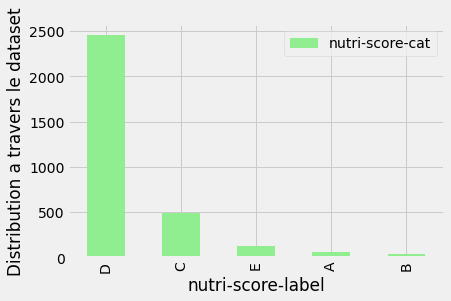

In [182]:
# Grpahique representatif de cette distribution
df3['nutri-score-cat'].value_counts().plot.bar(color='lightgreen')
plt.xlabel('nutri-score-label')
plt.ylabel('Distribution a travers le dataset')
plt.legend()

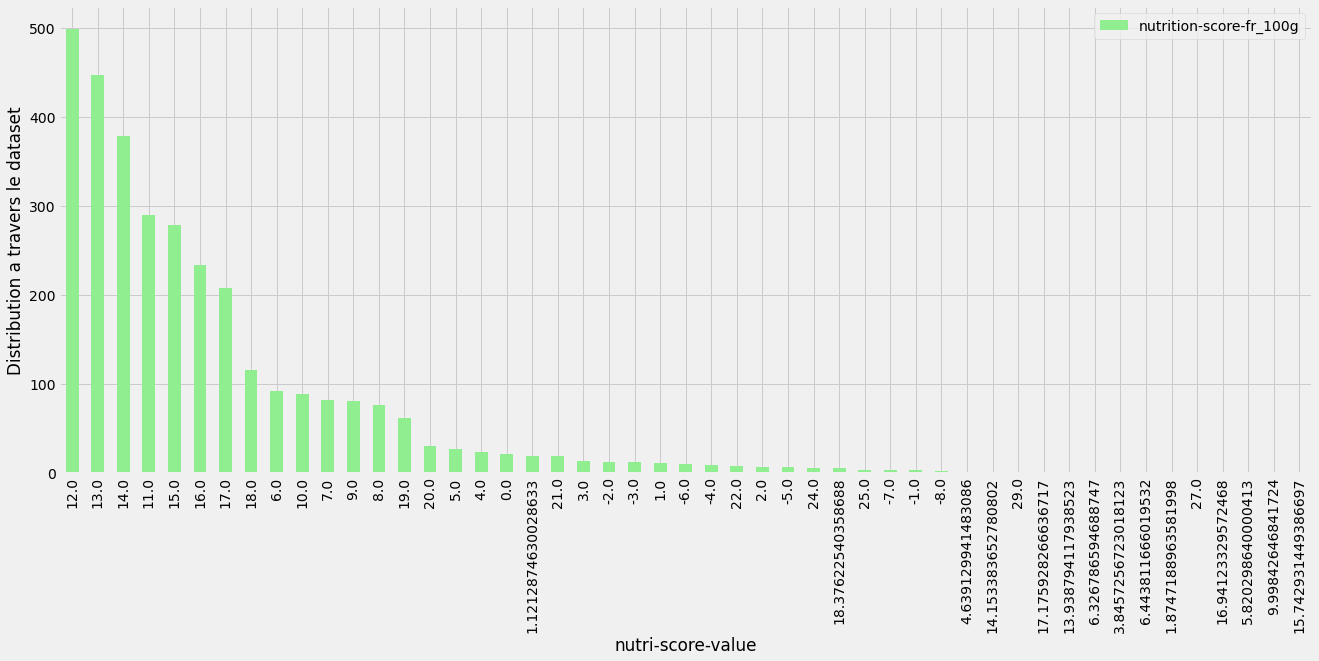

In [183]:
# Grpahique representatif de cette distribution
#plt.figsize=(2,2)
df3['nutrition-score-fr_100g'].value_counts().plot.bar(color='lightgreen',figsize=(20,8))
plt.xlabel('nutri-score-value')
plt.ylabel('Distribution a travers le dataset')
plt.legend()

In [184]:
# Elimination de la colonne cible qui n'est pas prise en compte dans l'analyse ACP
target_df = pd.DataFrame([],columns=['nutrition-score-fr_100g'])
target_df['nutrition-score-fr_100g']=df3['nutrition-score-fr_100g']
df3

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,...,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,energy_100g-calculated,year,delta_time,nutri-score-cat,sugars_cat,fat_cat
280,4.501930e+08,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 09:47:41+00:00,2017-03-09 09:47:41+00:00,"ice cream, vanilla",lactaid,united states,not specified,883.0,...,2.82,0.14224,0.0000,12.000000,180.310000,2017,0 days 00:00:00,D,Très sucré,Très gras
281,4.501930e+08,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 10:49:03+00:00,2017-03-09 10:49:03+00:00,"ice cream, butter pecan",lactaid,united states,not specified,1000.0,...,4.23,0.34036,0.0000,12.000000,218.290000,2017,0 days 00:00:00,D,Très sucré,Très gras
1601,1.111000e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 14:26:10+00:00,2017-03-09 14:26:10+00:00,"ice cream, vanilla bean",private selection,united states,not specified,946.0,...,4.30,0.13716,0.0013,13.000000,201.070000,2017,0 days 00:00:00,D,Très sucré,Très gras
1602,1.111000e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 14:26:08+00:00,2017-03-09 14:26:08+00:00,"ice cream, classic country vanilla",private selection,united states,not specified,946.0,...,4.30,0.16510,0.0013,13.000000,206.420000,2017,0 days 00:00:00,D,Très sucré,Très gras
1603,1.111000e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 14:19:09+00:00,2017-03-09 14:19:09+00:00,"ice cream, denali extreme moose tracks",private selection,united states,not specified,1230.0,...,4.71,0.22352,0.0014,14.000000,275.310000,2017,0 days 00:00:00,D,Très sucré,Très gras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301493,9.300602e+12,http://world-fr.openfoodfacts.org/produit/9300...,foodorigins,2015-08-13 14:59:23+00:00,2015-10-24 03:28:51+00:00,swirl mango ice cream,coles,aunited statestralia,not specified,0.0,...,0.00,0.00000,0.0000,1.121287,1.893475,2015,71 days 12:29:28,B,Sans sucré,Sans gras
301511,9.300602e+12,http://world-fr.openfoodfacts.org/produit/9300...,foodorigins,2015-08-17 11:19:22+00:00,2015-10-24 02:00:50+00:00,coconut lime ice cream,coles,aunited statestralia,en:coconut-lime-icecream,0.0,...,0.00,0.00000,0.0000,1.121287,1.893475,2015,67 days 14:41:28,B,Sans sucré,Sans gras
302072,9.310541e+12,http://world-fr.openfoodfacts.org/produit/9310...,openfoodfacts-contributors,2016-03-29 06:14:14+00:00,2016-03-29 06:26:29+00:00,mango & ice cream,wies,aunited statestralia,en:ice-creams,579.0,...,1.40,0.04826,0.0000,8.000000,130.300000,2016,0 days 00:12:15,C,Très sucré,peu gras
302470,9.336740e+12,http://world-fr.openfoodfacts.org/produit/9336...,usda-ndb-import,2017-03-09 09:45:01+00:00,2017-03-09 09:45:01+00:00,"really creamy ice cream, oregon strawberry",tillamook,united states,not specified,895.0,...,2.86,0.14478,0.0069,12.000000,182.870000,2017,0 days 00:00:00,D,Très sucré,Très gras


In [185]:
target_df.head(3)

,nutrition-score-fr_100g
280,12.0
281,12.0
1601,13.0


In [186]:
df3 = df3.drop('nutri-score-cat', axis=1)

In [187]:
df3.head(3)

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,...,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,energy_100g-calculated,year,delta_time,sugars_cat,fat_cat
280,4.501930e+08,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 09:47:41+00:00,2017-03-09 09:47:41+00:00,"ice cream, vanilla",lactaid,united states,not specified,883.0,...,0.0,2.82,0.14224,0.0000,12.0,180.31,2017,0 days,Très sucré,Très gras
281,4.501930e+08,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 10:49:03+00:00,2017-03-09 10:49:03+00:00,"ice cream, butter pecan",lactaid,united states,not specified,1000.0,...,1.4,4.23,0.34036,0.0000,12.0,218.29,2017,0 days,Très sucré,Très gras
1601,1.111000e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 14:26:10+00:00,2017-03-09 14:26:10+00:00,"ice cream, vanilla bean",private selection,united states,not specified,946.0,...,0.0,4.30,0.13716,0.0013,13.0,201.07,2017,0 days,Très sucré,Très gras


In [188]:
df_pca = df3

In [189]:
df_pca.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'brands', 'countries', 'main_category', 'energy_100g',
       'fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'vitamin-c_100g',
       'nutrition-score-fr_100g', 'energy_100g-calculated', 'year',
       'delta_time', 'sugars_cat', 'fat_cat'],
      dtype='object')

In [190]:
df_pca.drop('created_datetime', axis=1, inplace=True)
df_pca.drop('last_modified_datetime', axis=1, inplace=True)

In [191]:
df_pca.drop(['code', 'url', 'creator','product_name', 'brands', 'countries', 'main_category'],axis=1, inplace=True)

In [192]:
df_pca.drop(['sugars_cat','fat_cat'],axis=1, inplace=True)

In [193]:
# Etape de stadardisation des donnees pour eviter les effets de difference d'echelle
# definition d'une fonction pour ce calcul 
def standardscalar(data):
    "axis=0 means along the column, axis=1 means working along the row"
    scaled_df = (data - np.mean(data, axis=0))/np.std(data,axis=0)
    return scaled_df

scaled_df = standardscalar(df_pca)
scaled_df = np.around(scaled_df,3)
scaled_df

,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,energy_100g-calculated,year,delta_time
280,-0.361449,-0.087,0.651343,-0.814951,-0.727501,-0.567011,-0.649859,-0.68262,-0.246307,-0.123322,-0.447826,0.108058,-0.071
281,0.095292,0.768895,0.290648,-0.814951,-0.946892,0.571179,0.488569,0.765085,-0.246307,-0.123322,0.18024,0.108058,-0.071
1601,-0.115511,0.026579,0.908982,-0.493907,-0.346289,-0.567011,0.545087,-0.719741,0.216207,0.106546,-0.104523,0.108058,-0.071
1602,-0.115511,0.243594,1.991067,-0.650764,-0.512777,-0.567011,0.545087,-0.515577,0.216207,0.106546,-0.016051,0.108058,-0.071
1603,0.993159,0.967657,0.23912,0.709641,0.853361,1.384172,0.876119,-0.08869,0.251785,0.336414,1.123165,0.108058,-0.071
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301493,-3.808476,-2.372766,-1.873522,-4.119208,-3.357084,-0.567011,-2.926716,-1.721998,-0.246307,-2.623991,-3.398255,-7.738453,1.102
301511,-3.808476,-2.372766,-1.873522,-4.119208,-3.357084,-0.567011,-2.926716,-1.721998,-0.246307,-2.623991,-3.398255,-7.738453,1.038
302072,-1.548194,-1.500646,-1.873522,-0.718198,-0.011756,-0.567011,-1.796361,-1.369352,-0.246307,-1.042794,-1.274828,-3.815198,-0.071
302470,-0.314603,-0.054549,-0.379214,-0.140612,-0.690158,-0.567011,-0.617563,-0.66406,2.208575,-0.123322,-0.405492,0.108058,-0.071


In [194]:
# Calcul de la matrice de variance 
# N-dimensional dataset genere une matrice de covariance d'ordre N*N
# Si une variable tend a augmenter alors que les autres decroient alors le coefficient est negatif

In [195]:
def computecovariancematrix(data):
    len_data = data.shape[0]
    covariance = data.T.dot(data)/len_data
    return covariance

cov_mat = computecovariancematrix(scaled_df)
cov_mat = np.round(cov_mat,3)
cov_mat

,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,energy_100g-calculated,year,delta_time
energy_100g,1.0,0.64767,0.120117,0.582712,0.485606,0.085366,0.214966,0.260114,-0.156572,0.680889,0.765919,0.074161,-0.001928
fat_100g,0.64767,1.0,0.468596,0.068683,0.228172,0.079039,0.288101,0.040628,-0.124467,0.719595,0.856088,0.055057,-0.013292
cholesterol_100g,0.120117,0.468596,1.0,-0.234973,0.007653,-0.142881,0.180219,-0.138617,-0.045656,0.36289,0.333252,0.183076,-0.114725
carbohydrates_100g,0.582712,0.068683,-0.234973,1.0,0.512017,0.135681,0.11585,0.407793,-0.100415,0.300504,0.30635,0.153801,-0.082976
sugars_100g,0.485606,0.228172,0.007653,0.512017,1.0,-0.170352,0.035619,0.065529,-0.077284,0.622807,0.655568,0.076684,-0.023402
fiber_100g,0.085366,0.079039,-0.142881,0.135681,-0.170352,1.0,0.384854,0.134433,0.0647,-0.357586,0.04223,0.041674,-0.027167
proteins_100g,0.214966,0.288101,0.180219,0.11585,0.035619,0.384854,1.0,0.258824,-0.005787,0.017265,0.313835,0.086284,-0.027014
salt_100g,0.260114,0.040628,-0.138617,0.407793,0.065529,0.134433,0.258824,1.0,-0.12236,0.165971,0.08555,0.063309,-0.033835
vitamin-c_100g,-0.156572,-0.124467,-0.045656,-0.100415,-0.077284,0.0647,-0.005787,-0.12236,1.0,-0.175611,-0.129513,0.022902,-0.01243
nutrition-score-fr_100g,0.680889,0.719595,0.36289,0.300504,0.622807,-0.357586,0.017265,0.165971,-0.175611,1.0,0.809416,0.036291,0.002012


In [196]:
cov_mat.isna().sum()

energy_100g                0
fat_100g                   0
cholesterol_100g           0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
vitamin-c_100g             0
nutrition-score-fr_100g    0
energy_100g-calculated     0
year                       0
delta_time                 0
dtype: int64

In [197]:
cov_mat

,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,energy_100g-calculated,year,delta_time
energy_100g,1.0,0.64767,0.120117,0.582712,0.485606,0.085366,0.214966,0.260114,-0.156572,0.680889,0.765919,0.074161,-0.001928
fat_100g,0.64767,1.0,0.468596,0.068683,0.228172,0.079039,0.288101,0.040628,-0.124467,0.719595,0.856088,0.055057,-0.013292
cholesterol_100g,0.120117,0.468596,1.0,-0.234973,0.007653,-0.142881,0.180219,-0.138617,-0.045656,0.36289,0.333252,0.183076,-0.114725
carbohydrates_100g,0.582712,0.068683,-0.234973,1.0,0.512017,0.135681,0.11585,0.407793,-0.100415,0.300504,0.30635,0.153801,-0.082976
sugars_100g,0.485606,0.228172,0.007653,0.512017,1.0,-0.170352,0.035619,0.065529,-0.077284,0.622807,0.655568,0.076684,-0.023402
fiber_100g,0.085366,0.079039,-0.142881,0.135681,-0.170352,1.0,0.384854,0.134433,0.0647,-0.357586,0.04223,0.041674,-0.027167
proteins_100g,0.214966,0.288101,0.180219,0.11585,0.035619,0.384854,1.0,0.258824,-0.005787,0.017265,0.313835,0.086284,-0.027014
salt_100g,0.260114,0.040628,-0.138617,0.407793,0.065529,0.134433,0.258824,1.0,-0.12236,0.165971,0.08555,0.063309,-0.033835
vitamin-c_100g,-0.156572,-0.124467,-0.045656,-0.100415,-0.077284,0.0647,-0.005787,-0.12236,1.0,-0.175611,-0.129513,0.022902,-0.01243
nutrition-score-fr_100g,0.680889,0.719595,0.36289,0.300504,0.622807,-0.357586,0.017265,0.165971,-0.175611,1.0,0.809416,0.036291,0.002012


In [198]:
cov_mat = np.array(cov_mat, dtype = float)

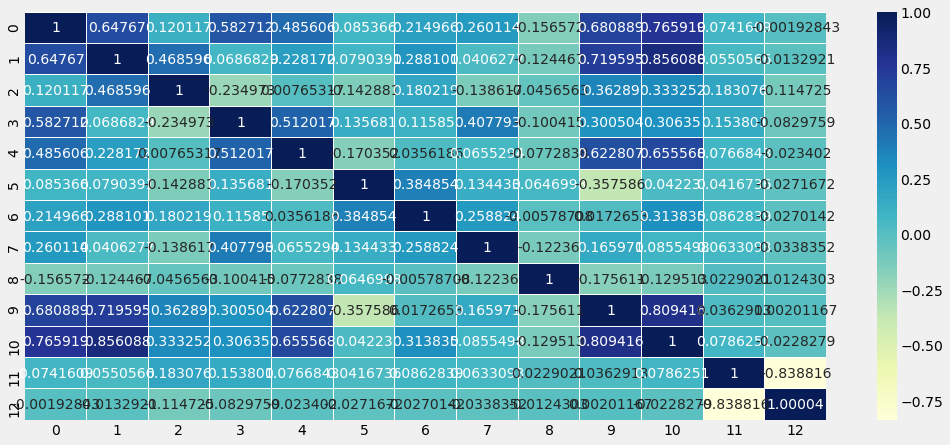

In [199]:
# plot de la matrice de covariance avec une heatmap
fig = plt.figure(figsize=(16,7))
"anotate each cell with the numeric value using integer formating"
sns.heatmap(cov_mat, annot=True, fmt='g', linewidths=.1, cmap='YlGnBu')
plt.show()

In [200]:
# Determination des valeurs et vecteurs propres 
# on importe eig a partir de linalg
eig_values, eig_vectors = np.linalg.eig(cov_mat)
print('\nNumber of Eigenvectors : %s  ' , len(eig_vectors))
print('\nEigenvectors : %s  \n\n%s ' ,eig_vectors)
print('\nEigenvalues :   \n\n%s ' ,eig_values)



Number of Eigenvectors : %s   13

Eigenvectors : %s  

%s  [[ 0.42534053 -0.16238904 -0.00465057 -0.00266766 -0.04834236  0.08844206
  -0.30130115  0.12473735 -0.39634138 -0.12188973  0.62798163  0.33066123
   0.02333109]
 [ 0.39423911  0.20179066  0.09756649 -0.29664979  0.01003928  0.05743346
  -0.34466616 -0.20595297 -0.05523788 -0.53716938 -0.34969309 -0.24075307
  -0.26433973]
 [ 0.17029291  0.5099614   0.0459481  -0.25147759  0.13693453 -0.2371161
   0.15384147  0.70051213  0.17892731  0.00555801  0.04268381  0.13003498
  -0.07383131]
 [ 0.24877784 -0.44525122 -0.20757813  0.26489945 -0.07717233  0.03432543
   0.0231472   0.51527549 -0.296794    0.0720699  -0.48235561 -0.14006129
  -0.08864118]
 [ 0.33228351 -0.11279691  0.05533518  0.34793507 -0.25830052  0.13204017
   0.51696131 -0.03678162  0.44947056 -0.40607115  0.14307045  0.05679696
  -0.09682704]
 [-0.01354152 -0.29752962 -0.28449959 -0.50643114 -0.15291064  0.41609563
  -0.2039099   0.17759775  0.469617    0.0099473  -0

In [201]:
# Conversion de l'array des valeurs propres en un dataframe pandas pour une meilleure visualisation

In [202]:
eigenvc_df = pd.DataFrame(eig_vectors)
eigenvc_df.columns = ['eigvec_'+str(i+1) for i in range(0, len(eig_vectors))]
eigenvc_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
eigvec_1,0.425341,0.394239,0.170293,0.248778,0.332284,-0.013542,0.150312,0.127150,-0.104798,0.432822,0.465025,0.082586,-0.045030
eigvec_2,-0.162389,0.201791,0.509961,-0.445251,-0.112797,-0.297530,-0.130841,-0.399781,0.050476,0.131039,0.061706,0.287559,-0.300320
eigvec_3,-0.004651,0.097566,0.045948,-0.207578,0.055335,-0.284500,-0.213925,-0.213482,-0.057378,0.186423,0.074781,-0.607542,0.597640
eigvec_4,-0.002668,-0.296650,-0.251478,0.264899,0.347935,-0.506431,-0.539399,-0.016264,-0.077216,0.170218,-0.104151,0.166925,-0.190220
eigvec_5,-0.048342,0.010039,0.136935,-0.077172,-0.258301,-0.152911,0.026232,0.365935,-0.854097,0.035737,-0.129911,0.002201,-0.022772
eigvec_6,0.088442,0.057433,-0.237116,0.034325,0.132040,0.416096,-0.167000,-0.662125,-0.473454,-0.167714,0.129290,0.028641,-0.069180
eigvec_7,-0.301301,-0.344666,0.153841,0.023147,0.516961,-0.203910,0.624214,-0.178769,-0.151073,-0.087257,0.025681,-0.005931,0.068253
eigvec_8,0.124737,-0.205953,0.700512,0.515275,-0.036782,0.177598,-0.213630,-0.104815,0.006697,-0.115566,-0.213980,-0.004598,0.192538
eigvec_9,-0.396341,-0.055238,0.178927,-0.296794,0.449471,0.469617,-0.369141,0.363297,-0.017735,0.073084,0.148300,-0.034703,-0.009664
eigvec_10,-0.121890,-0.537169,0.005558,0.072070,-0.406071,0.009947,-0.038844,-0.023212,0.001724,0.132555,0.711382,0.017735,0.019321


In [203]:
# Reorganisation des valeurs propres dans un ordre descendant 

In [204]:
indexes = eig_values.argsort()[::-1]
eig_values = eig_values[indexes]
eig_vectors = eig_vectors[:,indexes]
sorted_eig_pairs = [(np.around(np.abs(eig_values[i]),3),eig_vectors[:,i]) for i in range(len(eig_values))]
print('\nSorted Eigen-pairs (descending order) :\n')

sorted_eigenValues= []
for i in range(0, len(sorted_eig_pairs)):
    print("eigenvec_{0} :{1}".format(str(i+1),str(sorted_eig_pairs[i][0])))
    sorted_eigenValues.append(sorted_eig_pairs[i][0])

print("n\Total variance  (sum of eigenvalues)   : ", round(sum(sorted_eigenValues),3))



Sorted Eigen-pairs (descending order) :

eigenvec_1 :4.103
eigenvec_2 :1.902
eigenvec_3 :1.796
eigenvec_4 :1.551
eigenvec_5 :1.019
eigenvec_6 :0.79
eigenvec_7 :0.624
eigenvec_8 :0.445
eigenvec_9 :0.37
eigenvec_10 :0.161
eigenvec_11 :0.149
eigenvec_12 :0.076
eigenvec_13 :0.014
n\Total variance  (sum of eigenvalues)   :  13.0


In [205]:
# Choix du nombre 'K'( le nombre optimal des composantes principales)
# on utilise la methode de 'Kaise's stopping rule' qui consiste a choisir les colonnes avec des valeurs propres > 1.

In [206]:
best_eig_pairs = [sorted_eig_pairs[i][0] for i in range(0, len(sorted_eig_pairs)) if sorted_eig_pairs[i][0]>1.0]
print("\nAccording to Kaiser's stopping rule  :")
print("Number of PCs to be considered in PCA is : :{}".format(str(len(best_eig_pairs))))
print("Their eigenValues are : {}".format(str(len(best_eig_pairs))))



According to Kaiser's stopping rule  :
Number of PCs to be considered in PCA is : :5
Their eigenValues are : 5


In [207]:
# Construction de la matrice de projection a partir du choix des PC = 5

In [208]:
K=5
projection_matrix = np.array([list(np.hstack(i[1].reshape(13,1))) for i in sorted_eig_pairs[:]])
projection_matrix = projection_matrix[:K]
print('\nProjection-Matrix Dimension .....',projection_matrix.shape)
projection_matrix


Projection-Matrix Dimension ..... (5, 13)


array([[ 0.42534053,  0.39423911,  0.17029291,  0.24877784,  0.33228351,
        -0.01354152,  0.15031201,  0.12715032, -0.10479804,  0.43282211,
         0.4650253 ,  0.08258588, -0.04502998],
       [-0.00465057,  0.09756649,  0.0459481 , -0.20757813,  0.05533518,
        -0.28449959, -0.21392543, -0.21348194, -0.0573777 ,  0.18642262,
         0.07478148, -0.60754194,  0.59763998],
       [-0.16238904,  0.20179066,  0.5099614 , -0.44525122, -0.11279691,
        -0.29752962, -0.13084058, -0.39978142,  0.05047621,  0.13103919,
         0.06170602,  0.28755946, -0.3003205 ],
       [-0.00266766, -0.29664979, -0.25147759,  0.26489945,  0.34793507,
        -0.50643114, -0.5393993 , -0.01626432, -0.07721619,  0.17021783,
        -0.1041509 ,  0.16692522, -0.1902203 ],
       [-0.04834236,  0.01003928,  0.13693453, -0.07717233, -0.25830052,
        -0.15291064,  0.02623221,  0.36593485, -0.85409656,  0.03573662,
        -0.1299111 ,  0.00220102, -0.02277161]])

In [209]:
# Transformation du datset original vers le nouveau feature espace

In [210]:
scaled_df.shape
transformedData = (scaled_df).dot(projection_matrix.T)
transformedData.columns = ['PC'+str(i+1) for i in range(0,K)]
transformedData

,PC1,PC2,PC3,PC4,PC5
280,-0.922088,0.447664,1.341016,0.118972,0.442452
281,0.107134,-0.329111,0.252756,-1.401217,0.740237
1601,-0.13673,0.218175,1.202583,-0.438777,-0.069914
1602,0.105854,0.275446,1.810655,-0.887289,0.198766
1603,2.060053,-0.537415,-0.56881,-1.084677,-0.848952
...,...,...,...,...,...
301493,-9.044743,6.155315,-0.485151,-0.755273,0.984496
301511,-9.041861,6.117066,-0.46593,-0.743099,0.985953
302072,-3.518442,2.760926,-1.038062,1.355428,-0.267887
302470,-1.115063,0.116788,0.62483,0.348319,-1.856859


In [211]:
# on remarque que le data set transforme contient les 3195 lignes mais seulement 5 colonnes au lieu de 13
# Ce nouveau dataset regroupe le maximun de variance du dataset original

In [212]:
df3.columns

Index(['energy_100g', 'fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'vitamin-c_100g', 'nutrition-score-fr_100g', 'energy_100g-calculated',
       'year', 'delta_time'],
      dtype='object')

In [213]:
# la matrice de projection au format dataframe

In [214]:
projection_matrix_df  =pd.DataFrame(projection_matrix)
projection_matrix_df.columns = [str(i+1) for i in range(0, len(eig_vectors))]
projection_matrix_df = projection_matrix_df.set_index([pd.Index(['PC1','PC2','PC3','PC4','PC5',])])
projection_matrix_df

,1,2,3,4,5,6,7,8,9,10,11,12,13
PC1,0.425341,0.394239,0.170293,0.248778,0.332284,-0.013542,0.150312,0.127150,-0.104798,0.432822,0.465025,0.082586,-0.045030
PC2,-0.004651,0.097566,0.045948,-0.207578,0.055335,-0.284500,-0.213925,-0.213482,-0.057378,0.186423,0.074781,-0.607542,0.597640
PC3,-0.162389,0.201791,0.509961,-0.445251,-0.112797,-0.297530,-0.130841,-0.399781,0.050476,0.131039,0.061706,0.287559,-0.300320
PC4,-0.002668,-0.296650,-0.251478,0.264899,0.347935,-0.506431,-0.539399,-0.016264,-0.077216,0.170218,-0.104151,0.166925,-0.190220
PC5,-0.048342,0.010039,0.136935,-0.077172,-0.258301,-0.152911,0.026232,0.365935,-0.854097,0.035737,-0.129911,0.002201,-0.022772


In [215]:
# On reconnait le nom des colonnes a considerer selon la combinaison 'classement/ valeur'
# PC1 = energy_100g
# PC2 = delta_time
# PC3 = cholesterol
# PC4 = carbohydrates_100g
# PC5 = salt_100g

In [216]:
# Le resultat est consequant vu que la methode a elimine l'ensemble des colonnes liees entre elles

In [217]:
df4.to_csv('ice-cream.csv', index=False)